# **Project Name**    -  PhonePe Transaction Insights



##### **Project Type**    - EDA
##### **Contribution**    - Individual
##### **Name**- Alwin Shaji


# **Project Summary**

This project explores PhonePe’s digital transaction data to extract meaningful business insights using Exploratory Data Analysis (EDA). The data includes transaction volumes, insurance purchases, user brand engagement, and app usage across Indian states and quarters. With a focus on real-world applications like user engagement, marketing optimization, product development, and insurance insights, the project analyzes structured SQLite data using SQL, Pandas, Seaborn, and Matplotlib.

To visualize these insights effectively, an interactive dashboard was developed using Streamlit. It features state-wise filters, customizable views, and dynamic graphs to help stakeholders track performance, user activity, and growth patterns over time. The dashboard includes comparisons of app opens vs transactions, brand-wise usage analysis, insurance adoption trends, and much more—all designed to support data-driven business decisions.

Since this is an exploratory and business intelligence-oriented project, machine learning was not implemented. Instead, the focus remained on understanding trends, identifying key patterns, and presenting them in a user-friendly dashboard format. The result is a powerful data product that provides real-time exploration and strategic insights for decision-makers.



# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


In today’s fast-evolving fintech landscape, digital payment platforms like PhonePe generate massive volumes of transaction data across India. However, raw transactional data alone is not enough—what truly matters is how these data points are translated into business intelligence. Companies need to understand how users behave over time, how different regions contribute to growth, which transaction categories drive the most value, and how engagement trends evolve across states and devices.

This project addresses the need for strategic insights from PhonePe’s large-scale transaction and user data by conducting a structured Exploratory Data Analysis (EDA). The goal is to uncover hidden trends, visualize state-wise and category-wise performance, monitor insurance adoption, and evaluate user-brand interactions. Through dynamic visualizations and an interactive dashboard, the project empowers stakeholders to make data-driven decisions, optimize marketing strategies, enhance product development, and benchmark regional performance effectively.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

### Dataset Loading

### Dataset First View

In [1]:
!git clone https://github.com/PhonePe/pulse.git

fatal: destination path 'pulse' already exists and is not an empty directory.


In [2]:
import os
import json
import pandas as pd

base_path = './pulse/data/aggregated/transaction/country/india/state'
data = []

for state_name in os.listdir(base_path):
    state_path = os.path.join(base_path, state_name)
    if not os.path.isdir(state_path):
        continue

    for year_folder in os.listdir(state_path):
        year_path = os.path.join(state_path, year_folder)
        if not os.path.isdir(year_path):
            continue

        for file_name in os.listdir(year_path):
            if file_name.endswith('.json'):
                file_path = os.path.join(year_path, file_name)
                with open(file_path, 'r') as f:
                    content = json.load(f)

                quarter = file_name.replace('.json', '')
                if 'data' in content and 'transactionData' in content['data']:
                    for txn in content['data']['transactionData']:
                        txn_type = txn['name']
                        for instr in txn['paymentInstruments']:
                            row = {
                                'state': state_name.replace('-', ' ').title(),
                                'year': int(year_folder),
                                'quarter': f"Q{quarter}",
                                'transaction_type': txn_type,
                                'count': instr['count'],
                                'amount': instr['amount']
                            }
                            data.append(row)

df = pd.DataFrame(data)


### Dataset Inclusion to Database

In [3]:
import sqlite3
import pandas as pd

# ✅ Assuming your DataFrame is named df
# Preview
print("📊 DataFrame Preview:")
print(df.head())

# ✅ Connect to SQLite DB
conn = sqlite3.connect('phonepe_data.db')
cursor = conn.cursor()

cursor.execute('''
    CREATE TABLE IF NOT EXISTS aggregated_transactions (
        state TEXT,
        year INTEGER,
        quarter TEXT,
        transaction_type TEXT,
        count INTEGER,
        amount REAL
    )
''')

# ✅ Replace table data with DataFrame content
df.to_sql('aggregated_transactions', conn, if_exists='replace', index=False)

# ✅ Confirm table exists
tables = cursor.execute("SELECT name FROM sqlite_master WHERE type='table';").fetchall()
print("\n📦 Tables in Database:")
for table in tables:
    print("-", table[0])

# ✅ Preview the inserted data
print("\n🔍 Sample from 'aggregated_transactions':")
preview = pd.read_sql_query("SELECT * FROM aggregated_transactions LIMIT 5;", conn)
print(preview)

# ✅ Check structure
print("\n🧱 Table Structure:")
schema = cursor.execute("PRAGMA table_info(aggregated_transactions);").fetchall()
for col in schema:
    print(f"- {col[1]} ({col[2]})")

# ✅ Row count
row_count = cursor.execute("SELECT COUNT(*) FROM aggregated_transactions;").fetchone()[0]
print(f"\n📊 Total Rows: {row_count}")

# ✅ Commit and close
conn.commit()
conn.close()


📊 DataFrame Preview:
   state  year quarter          transaction_type     count        amount
0  Assam  2023      Q1         Merchant payments  48987048  3.941686e+10
1  Assam  2023      Q1     Peer-to-peer payments  48461200  1.665092e+11
2  Assam  2023      Q1  Recharge & bill payments  16113464  6.266406e+09
3  Assam  2023      Q1        Financial Services     82270  8.697870e+07
4  Assam  2023      Q1                    Others    116656  7.476826e+07

📦 Tables in Database:
- top_users
- top_transactions
- top_insurances
- aggregated_users
- aggregated_insurance
- map_transactions
- map_users
- map_insurances
- aggregated_transactions

🔍 Sample from 'aggregated_transactions':
   state  year quarter          transaction_type     count        amount
0  Assam  2023      Q1         Merchant payments  48987048  3.941686e+10
1  Assam  2023      Q1     Peer-to-peer payments  48461200  1.665092e+11
2  Assam  2023      Q1  Recharge & bill payments  16113464  6.266406e+09
3  Assam  2023      

In [4]:

# Define path to aggregated user data
user_base_path = './pulse/data/aggregated/user/country/india/state'

user_data = []

# Loop through each state
for state in os.listdir(user_base_path):
    state_path = os.path.join(user_base_path, state)
    if not os.path.isdir(state_path):
        continue

    for year in os.listdir(state_path):
        year_path = os.path.join(state_path, year)
        if not os.path.isdir(year_path):
            continue

        for file in os.listdir(year_path):
            if file.endswith('.json'):
                file_path = os.path.join(year_path, file)
                with open(file_path, 'r') as f:
                    content = json.load(f)

                quarter = file.replace('.json', '')

                if content['data'] and content['data']['usersByDevice']:
                    for device_info in content['data']['usersByDevice']:
                        user_data.append({
                            'state': state.replace("-", " ").title(),
                            'year': int(year),
                            'quarter': f"Q{quarter}",
                            'brand': device_info['brand'],
                            'count': device_info['count'],
                            'percentage': device_info['percentage']
                        })

# Convert to DataFrame
df_user = pd.DataFrame(user_data)

# Connect to same SQLite DB
conn = sqlite3.connect("phonepe_data.db")
df_user.to_sql("aggregated_users", conn, if_exists="replace", index=False)

print("✅ Aggregated User data inserted.")

✅ Aggregated User data inserted.


In [5]:

# Define path to aggregated insurance data
insurance_base_path = './pulse/data/aggregated/insurance/country/india/state'

insurance_data = []

# Loop through states
for state in os.listdir(insurance_base_path):
    state_path = os.path.join(insurance_base_path, state)
    if not os.path.isdir(state_path):
        continue

    for year in os.listdir(state_path):
        year_path = os.path.join(state_path, year)
        if not os.path.isdir(year_path):
            continue

        for file in os.listdir(year_path):
            if file.endswith('.json'):
                file_path = os.path.join(year_path, file)
                with open(file_path, 'r') as f:
                    content = json.load(f)

                quarter = file.replace('.json', '')

                # Safely extract insuranceData
                if content['data'] and content['data'].get('transactionData'):
                    for txn in content['data']['transactionData']:
                        txn_type = txn['name']
                        for instr in txn['paymentInstruments']:
                            insurance_data.append({
                                'state': state.replace("-", " ").title(),
                                'year': int(year),
                                'quarter': f"Q{quarter}",
                                'transaction_type': txn_type,
                                'count': instr['count'],
                                'amount': instr['amount']
                            })

# Create DataFrame
df_insurance = pd.DataFrame(insurance_data)

# Save to DB
conn = sqlite3.connect("phonepe_data.db")
df_insurance.to_sql("aggregated_insurance", conn, if_exists="replace", index=False)

print("✅ Aggregated Insurance data inserted.")

✅ Aggregated Insurance data inserted.


In [6]:
import os
import json
import pandas as pd
import sqlite3

# ✅ Path to the cloned Git repo's map transaction data
base_path = './pulse/data/map/transaction/hover/country/india/state'

# ✅ Data holder
data = []

# ✅ Loop through each state folder
for state_name in os.listdir(base_path):
    state_path = os.path.join(base_path, state_name)
    if not os.path.isdir(state_path):
        continue

    for year_folder in os.listdir(state_path):
        year_path = os.path.join(state_path, year_folder)
        if not os.path.isdir(year_path):
            continue

        for file_name in os.listdir(year_path):
            if file_name.endswith('.json'):
                file_path = os.path.join(year_path, file_name)
                with open(file_path, 'r') as f:
                    content = json.load(f)

                # Extract quarter from filename (e.g., 1.json -> Q1)
                quarter = file_name.replace('.json', '')

                # ✅ Handle hoverDataList
                hover_list = content.get('data', {}).get('hoverDataList', [])

                for district_data in hover_list:
                    try:
                        district_name = district_data['name']
                        metric = district_data['metric'][0]  # Assumes only one metric per district
                        row = {
                            'state': state_name.replace('-', ' ').title(),
                            'year': int(year_folder),
                            'quarter': f"Q{quarter}",
                            'district': district_name,
                            'count': metric['count'],
                            'amount': metric['amount']
                        }
                        data.append(row)
                    except (KeyError, IndexError, TypeError) as e:
                        print(f"⚠️ Skipping file: {file_path} due to error: {e}")

# ✅ Convert to DataFrame
map_df = pd.DataFrame(data)

# ✅ Preview
print("📊 Preview of parsed map data:")
print(map_df.head())

# ✅ Save to unified database
conn = sqlite3.connect("phonepe_data.db")
map_df.to_sql("map_transactions", conn, if_exists="replace", index=False)
conn.commit()
print("✅ Data inserted into 'map_transactions' table in phonepe_data.db.")

# ✅ Confirm insertion
print("🔍 Sample from DB:")
print(pd.read_sql_query("SELECT * FROM map_transactions LIMIT 5", conn))

# ✅ Close connection
conn.close()


📊 Preview of parsed map data:
   state  year quarter                district    count        amount
0  Assam  2023      Q1       tinsukia district  3283559  6.117151e+09
1  Assam  2023      Q1      lakhimpur district  2476912  4.343544e+09
2  Assam  2023      Q1         kamrup district  4930296  9.371100e+09
3  Assam  2023      Q1      kokrajhar district  2355923  4.909355e+09
4  Assam  2023      Q1  karbi anglong district  1520698  3.214908e+09
✅ Data inserted into 'map_transactions' table in phonepe_data.db.
🔍 Sample from DB:
   state  year quarter                district    count        amount
0  Assam  2023      Q1       tinsukia district  3283559  6.117151e+09
1  Assam  2023      Q1      lakhimpur district  2476912  4.343544e+09
2  Assam  2023      Q1         kamrup district  4930296  9.371100e+09
3  Assam  2023      Q1      kokrajhar district  2355923  4.909355e+09
4  Assam  2023      Q1  karbi anglong district  1520698  3.214908e+09


In [7]:
import os
import json
import pandas as pd
import sqlite3

# ✅ Base path for map user hover data
base_path = './pulse/data/map/user/hover/country/india/state'

# ✅ Store user hover data
user_hover_data = []

for state_name in os.listdir(base_path):
    state_path = os.path.join(base_path, state_name)
    if not os.path.isdir(state_path):
        continue

    for year in os.listdir(state_path):
        year_path = os.path.join(state_path, year)
        if not os.path.isdir(year_path):
            continue

        for file_name in os.listdir(year_path):
            if file_name.endswith('.json'):
                file_path = os.path.join(year_path, file_name)
                with open(file_path, 'r') as f:
                    content = json.load(f)

                quarter = file_name.replace('.json', '')

                # ✅ Extract hoverData
                if 'data' in content and 'hoverData' in content['data']:
                    for district, metrics in content['data']['hoverData'].items():
                        user_hover_data.append({
                            'state': state_name.replace('-', ' ').title(),
                            'year': int(year),
                            'quarter': f"Q{quarter}",
                            'district': district,
                            'registered_users': metrics.get('registeredUsers'),
                            'app_opens': metrics.get('appOpens')
                        })

# ✅ Convert to DataFrame
user_df = pd.DataFrame(user_hover_data)
print("📊 Map User Data Preview:")
print(user_df.head())

# ✅ Connect to the main database and insert data
conn = sqlite3.connect("phonepe_data.db")
user_df.to_sql("map_users", conn, if_exists="replace", index=False)
conn.commit()
print("✅ Data inserted into 'map_users' table in phonepe_data.db.")

# ✅ Confirm sample insert
print("\n🔍 Sample from DB:")
print(pd.read_sql_query("SELECT * FROM map_users LIMIT 5", conn))

# ✅ Close DB connection
conn.close()


📊 Map User Data Preview:
   state  year quarter                district  registered_users  app_opens
0  Assam  2023      Q1       tinsukia district            219077   40115013
1  Assam  2023      Q1      lakhimpur district            146560   30457042
2  Assam  2023      Q1         kamrup district            242982   26113435
3  Assam  2023      Q1      kokrajhar district            100303   19872351
4  Assam  2023      Q1  karbi anglong district             95739   19148924
✅ Data inserted into 'map_users' table in phonepe_data.db.

🔍 Sample from DB:
   state  year quarter                district  registered_users  app_opens
0  Assam  2023      Q1       tinsukia district            219077   40115013
1  Assam  2023      Q1      lakhimpur district            146560   30457042
2  Assam  2023      Q1         kamrup district            242982   26113435
3  Assam  2023      Q1      kokrajhar district            100303   19872351
4  Assam  2023      Q1  karbi anglong district             95

In [8]:

# ✅ Base path for map insurance hover data
base_path = './pulse/data/map/insurance/hover/country/india/state'

# ✅ Store insurance hover data
insurance_hover_data = []

for state_name in os.listdir(base_path):
    state_path = os.path.join(base_path, state_name)
    if not os.path.isdir(state_path):
        continue

    for year in os.listdir(state_path):
        year_path = os.path.join(state_path, year)
        if not os.path.isdir(year_path):
            continue

        for file_name in os.listdir(year_path):
            if file_name.endswith('.json'):
                file_path = os.path.join(year_path, file_name)
                with open(file_path, 'r') as f:
                    content = json.load(f)

                quarter = file_name.replace('.json', '')

                # ✅ Extract hoverDataList
                if 'data' in content and 'hoverDataList' in content['data']:
                    for district_data in content['data']['hoverDataList']:
                        try:
                            district_name = district_data['name']
                            metric = district_data['metric'][0]  # Assume first entry
                            insurance_hover_data.append({
                                'state': state_name.replace('-', ' ').title(),
                                'year': int(year),
                                'quarter': f"Q{quarter}",
                                'district': district_name,
                                'count': metric.get('count'),
                                'amount': metric.get('amount')
                            })
                        except (KeyError, IndexError, TypeError) as e:
                            print(f"⚠️ Skipping due to error: {e} in file {file_path}")

# ✅ Convert to DataFrame
insurance_df = pd.DataFrame(insurance_hover_data)
print("📊 Insurance Hover Data Preview:")
print(insurance_df.head())

# ✅ Connect to DB and insert into 'map_insurances' table
conn = sqlite3.connect("phonepe_data.db")
insurance_df.to_sql("map_insurances", conn, if_exists="replace", index=False)
conn.commit()
print("✅ Data inserted into 'map_insurances' table in phonepe_data.db.")

# ✅ Show sample insert
print("\n🔍 Sample from DB:")
print(pd.read_sql_query("SELECT * FROM map_insurances LIMIT 5", conn))

# ✅ Close connection
conn.close()


📊 Insurance Hover Data Preview:
   state  year quarter                district  count     amount
0  Assam  2023      Q1       tinsukia district    813  1490071.0
1  Assam  2023      Q1      lakhimpur district    688  1386745.0
2  Assam  2023      Q1         kamrup district    923  1577259.0
3  Assam  2023      Q1      kokrajhar district    379   573910.0
4  Assam  2023      Q1  karbi anglong district    315   641183.0
✅ Data inserted into 'map_insurances' table in phonepe_data.db.

🔍 Sample from DB:
   state  year quarter                district  count     amount
0  Assam  2023      Q1       tinsukia district    813  1490071.0
1  Assam  2023      Q1      lakhimpur district    688  1386745.0
2  Assam  2023      Q1         kamrup district    923  1577259.0
3  Assam  2023      Q1      kokrajhar district    379   573910.0
4  Assam  2023      Q1  karbi anglong district    315   641183.0


In [9]:

conn = sqlite3.connect("phonepe_data.db")
cursor = conn.cursor()

# Create table
cursor.execute('''
CREATE TABLE IF NOT EXISTS top_users (
    state TEXT,
    year INTEGER,
    quarter TEXT,
    district TEXT,
    registeredUsers INTEGER,
    appOpens INTEGER
)
''')

# Set path
base_path = './pulse/data/top/user/country/india/state'

# Extract data
data = []
for state in os.listdir(base_path):
    state_path = os.path.join(base_path, state)
    if not os.path.isdir(state_path):
        continue
    for year in os.listdir(state_path):
        year_path = os.path.join(state_path, year)
        for file in os.listdir(year_path):
            file_path = os.path.join(year_path, file)
            with open(file_path, 'r') as f:
                content = json.load(f)
            quarter = file.replace('.json', '')
            for district in content['data']['districts']:
                row = {
                    'state': state.replace('-', ' ').title(),
                    'year': int(year),
                    'quarter': f"Q{quarter}",
                    'district': district['name'],
                    'registeredUsers': district['registeredUsers'],
                    'appOpens': district.get('appOpens', None)

                }
                data.append(row)

# Save to DB
df = pd.DataFrame(data)
df.to_sql('top_users', conn, if_exists='append', index=False)
print("✅ Top User data inserted.")


✅ Top User data inserted.


In [10]:
import os
import json
import pandas as pd

# Correct base path for top/transaction data
base_path = './pulse/data/top/transaction/country/india/state'

# Data holder
data = []

# Loop through each state
for state in os.listdir(base_path):
    state_path = os.path.join(base_path, state)
    if not os.path.isdir(state_path):
        continue

    for year in os.listdir(state_path):
        year_path = os.path.join(state_path, year)
        if not os.path.isdir(year_path):
            continue

        for file in os.listdir(year_path):
            if file.endswith('.json'):
                file_path = os.path.join(year_path, file)
                with open(file_path, 'r') as f:
                    content = json.load(f)

                quarter = file.replace('.json', '')

                # Extract top transaction data
                entity_list = content.get('data', {}).get('entities', []) or []

                for entity in entity_list:
                    if 'name' in entity and 'metric' in entity:
                        row = {
                            'state': state.replace('-', ' ').title(),
                            'year': int(year),
                            'quarter': f"Q{quarter}",
                            'entity_name': entity['name'],
                            'entity_type': entity.get('entityType', 'NA'),
                            'count': entity['metric'].get('count', 0),
                            'amount': entity['metric'].get('amount', 0.0)
                        }
                        data.append(row)

# Convert to DataFrame
df_top_transaction = pd.DataFrame(data)
print("✅ Top Transaction data inserted.")


✅ Top Transaction data inserted.


In [11]:
# Create table
cursor.execute('''
CREATE TABLE IF NOT EXISTS top_insurances (
    state TEXT,
    year INTEGER,
    quarter TEXT,
    entityName TEXT,
    type TEXT,
    count INTEGER,
    amount REAL
)
''')

base_path = './pulse/data/top/insurance/country/india/state'
data = []

for state in os.listdir(base_path):
    state_path = os.path.join(base_path, state)
    for year in os.listdir(state_path):
        year_path = os.path.join(state_path, year)
        for file in os.listdir(year_path):
            file_path = os.path.join(year_path, file)
            with open(file_path, 'r') as f:
                content = json.load(f)
            quarter = file.replace('.json', '')
            for entity in content['data']['districts']:
                row = {
                    'state': state.replace('-', ' ').title(),
                    'year': int(year),
                    'quarter': f"Q{quarter}",
                    'entityName': entity['entityName'],
                    'type': entity['metric']['type'],
                    'count': entity['metric']['count'],
                    'amount': entity['metric']['amount']
                }
                data.append(row)

df = pd.DataFrame(data)
df.to_sql('top_insurances', conn, if_exists='append', index=False)
print("✅ Top Insurance data inserted.")


✅ Top Insurance data inserted.


### Dataset Rows & Columns count

In [12]:

def describe_and_preview_table(db_path, table_name, limit=10):
    """Prints column info and previews first rows of a SQLite table."""
    try:
        conn = sqlite3.connect(db_path)
        cursor = conn.cursor()

        # Show column names and types
        print(f"\n📄 Schema for table: `{table_name}`")
        cursor.execute(f"PRAGMA table_info({table_name})")
        columns_info = cursor.fetchall()
        for col in columns_info:
            print(f" - {col[1]} ({col[2]})")

        # Show row count
        cursor.execute(f"SELECT COUNT(*) FROM {table_name}")
        row_count = cursor.fetchone()[0]
        print(f"\n🧾 Total rows: {row_count}")

        # Show top rows
        print(f"\n🔍 Preview of first {limit} rows:\n")
        df = pd.read_sql_query(f"SELECT * FROM {table_name} LIMIT {limit}", conn)
        print(df)

        conn.close()
        
    except Exception as e:
        print(f"❌ Error accessing table '{table_name}':", e)


In [13]:

# Reconnect to the database
conn = sqlite3.connect("phonepe_data.db")

# Read the full table
df_full = pd.read_sql_query("SELECT * FROM aggregated_transactions", conn)

# Show first 20 rows
print("First 20 rows:\n")
print(df_full.head(20))

# Show detailed schema info
print("\nSchema Info:\n")
print(df_full.info())

# Optional: show shape and summary
print("\nShape:", df_full.shape)



First 20 rows:

    state  year quarter          transaction_type     count        amount
0   Assam  2023      Q1         Merchant payments  48987048  3.941686e+10
1   Assam  2023      Q1     Peer-to-peer payments  48461200  1.665092e+11
2   Assam  2023      Q1  Recharge & bill payments  16113464  6.266406e+09
3   Assam  2023      Q1        Financial Services     82270  8.697870e+07
4   Assam  2023      Q1                    Others    116656  7.476826e+07
5   Assam  2023      Q3         Merchant payments  82126315  5.153317e+10
6   Assam  2023      Q3     Peer-to-peer payments  66737077  1.850305e+11
7   Assam  2023      Q3  Recharge & bill payments  18524152  7.310559e+09
8   Assam  2023      Q3        Financial Services    105975  1.185293e+08
9   Assam  2023      Q3                    Others     81832  6.525754e+07
10  Assam  2023      Q4         Merchant payments  95438754  6.051390e+10
11  Assam  2023      Q4     Peer-to-peer payments  79797949  2.168759e+11
12  Assam  2023      Q

In [14]:
data = []

# Traverse each state directory
for state_name in os.listdir(base_path):
    state_path = os.path.join(base_path, state_name)

    if not os.path.isdir(state_path):
        continue

    for year_folder in os.listdir(state_path):
        year_path = os.path.join(state_path, year_folder)

        if not os.path.isdir(year_path):
            continue

        for file_name in os.listdir(year_path):
            if file_name.endswith('.json'):
                file_path = os.path.join(year_path, file_name)
                with open(file_path, 'r') as f:
                    content = json.load(f)

                quarter = file_name.replace('.json', '')

                if content['data'] and 'transactionData' in content['data']:
                    for txn in content['data']['transactionData']:
                        txn_type = txn['name']
                        for instr in txn['paymentInstruments']:
                            row = {
                                'state': state_name.replace('-', ' ').title(),
                                'year': int(year_folder),
                                'quarter': f"Q{quarter}",
                                'transaction_type': txn_type,
                                'count': instr['count'],
                                'amount': instr['amount']
                            }
                            data.append(row)

# Convert to DataFrame
df = pd.DataFrame(data)


### Dataset Information

In [15]:
import sqlite3
import pandas as pd

# Connect to your SQLite database
conn = sqlite3.connect("phonepe_data.db")
cursor = conn.cursor()

# 1. ✅ List all tables
tables_df = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table';", conn)
print("📦 All Tables in the Database:\n")
print(tables_df)

# 2. ✅ Show structure and row count for each table
print("\n🔍 Table Structures and Row Counts:\n")
for table in tables_df['name']:
    print(f"\n=== 📂 Table: {table} ===")
    
    # Column info
    structure = pd.read_sql_query(f"PRAGMA table_info({table});", conn)
    print("🧱 Columns:")
    print(structure[['name', 'type']])
    
    # Row count
    cursor.execute(f"SELECT COUNT(*) FROM {table}")
    row_count = cursor.fetchone()[0]
    print(f"\n📊 Total Rows: {row_count}")
    
    # Sample rows
    sample = pd.read_sql_query(f"SELECT * FROM {table} LIMIT 5;", conn)
    print("\n🔍 Sample Rows:")
    print(sample)

# Close connection
conn.close()


📦 All Tables in the Database:

                      name
0                top_users
1         top_transactions
2           top_insurances
3  aggregated_transactions
4         aggregated_users
5     aggregated_insurance
6         map_transactions
7                map_users
8           map_insurances

🔍 Table Structures and Row Counts:


=== 📂 Table: top_users ===
🧱 Columns:
              name     type
0            state     TEXT
1             year  INTEGER
2          quarter     TEXT
3         district     TEXT
4  registeredUsers  INTEGER
5         appOpens  INTEGER

📊 Total Rows: 41480

🔍 Sample Rows:
   state  year quarter             district  registeredUsers appOpens
0  Assam  2023      Q1  kamrup metropolitan           938802     None
1  Assam  2023      Q1               nagaon           330283     None
2  Assam  2023      Q1              barpeta           294210     None
3  Assam  2023      Q1               cachar           282643     None
4  Assam  2023      Q1             sonit

### SQL QUERIES

In [16]:
import sqlite3
import pandas as pd

# ✅ Connect to the database first
conn = sqlite3.connect('phonepe_data.db')

# ✅ Total transaction amount per state (Top 10)
query = """
SELECT state, SUM(amount) AS total_amount
FROM aggregated_transactions
GROUP BY state
ORDER BY total_amount DESC
LIMIT 10
"""

top_states = pd.read_sql_query(query, conn)
print(top_states)

# ✅ Always a good practice
conn.close()


            state  total_amount
0       Telangana  4.165596e+13
1       Karnataka  4.067872e+13
2     Maharashtra  4.037420e+13
3  Andhra Pradesh  3.466908e+13
4   Uttar Pradesh  2.688521e+13
5       Rajasthan  2.634324e+13
6  Madhya Pradesh  1.912528e+13
7           Bihar  1.790135e+13
8     West Bengal  1.558416e+13
9          Odisha  1.226398e+13


In [17]:
conn = sqlite3.connect('phonepe_data.db')

# Query: Total transaction count per year
query = """
SELECT year, SUM(count) AS total_transactions
FROM aggregated_transactions
GROUP BY year
ORDER BY year
"""
yearly_growth = pd.read_sql_query(query, conn)
print("📈 Year-wise Transaction Count:")
print(yearly_growth)

conn.close()


📈 Year-wise Transaction Count:
   year  total_transactions
0  2018          1080202410
1  2019          4079827215
2  2020          7973974741
3  2021         19288429220
4  2022         39301293734
5  2023         64257054687
6  2024         99303434867


In [18]:
conn = sqlite3.connect('phonepe_data.db')

# Query: Peer-to-peer payments over time
query = """
SELECT year, quarter, SUM(amount) AS p2p_total
FROM aggregated_transactions
WHERE transaction_type = 'Peer-to-peer payments'
GROUP BY year, quarter
ORDER BY year, quarter
"""
p2p_trend = pd.read_sql_query(query, conn)
print("🔁 Quarterly P2P Payment Trend:")
print(p2p_trend)

conn.close()


🔁 Quarterly P2P Payment Trend:
    year quarter     p2p_total
0   2018      Q1  1.472451e+11
1   2018      Q2  2.647659e+11
2   2018      Q3  4.259634e+11
3   2018      Q4  5.949896e+11
4   2019      Q1  8.878850e+11
5   2019      Q2  1.196418e+12
6   2019      Q3  1.440507e+12
7   2019      Q4  1.963947e+12
8   2020      Q1  2.320551e+12
9   2020      Q2  2.243908e+12
10  2020      Q3  3.287038e+12
11  2020      Q4  4.474523e+12
12  2021      Q1  5.170826e+12
13  2021      Q2  6.163131e+12
14  2021      Q3  7.429314e+12
15  2021      Q4  9.203858e+12
16  2022      Q1  1.050588e+13
17  2022      Q2  1.212346e+13
18  2022      Q3  1.283774e+13
19  2022      Q4  1.457881e+13
20  2023      Q1  1.592479e+13
21  2023      Q2  1.772266e+13
22  2023      Q3  1.834258e+13
23  2023      Q4  2.053369e+13
24  2024      Q1  2.232737e+13
25  2024      Q2  2.381770e+13
26  2024      Q3  2.396394e+13
27  2024      Q4  2.663387e+13


In [19]:
import sqlite3
import pandas as pd

# Connect to your DB
conn = sqlite3.connect('phonepe_data.db')

# Replace 'aggregated_users' with the table you want to inspect
table_name = 'aggregated_users'

# Query to get column info
column_info = pd.read_sql_query(f"PRAGMA table_info({table_name});", conn)

# Show column names and types
print(f"📊 Columns in '{table_name}' table:")
print(column_info[['name', 'type']])


📊 Columns in 'aggregated_users' table:
         name     type
0       state     TEXT
1        year  INTEGER
2     quarter     TEXT
3       brand     TEXT
4       count  INTEGER
5  percentage     REAL


In [20]:
conn = sqlite3.connect('phonepe_data.db')

# Query: Highest number of users by state
query = """
SELECT state, SUM(count) AS total_users
FROM aggregated_users
GROUP BY state
ORDER BY total_users DESC
LIMIT 5
"""
top_user_states = pd.read_sql_query(query, conn)
print("👥 Top 5 States by Registered Users:")
print(top_user_states)

conn.close()


👥 Top 5 States by Registered Users:
            state  total_users
0     Maharashtra    452075011
1   Uttar Pradesh    355969633
2       Karnataka    291372780
3  Andhra Pradesh    225414835
4       Rajasthan    215645588


In [21]:
conn = sqlite3.connect('phonepe_data.db')

# Query: Average transaction amount per type
query = """
SELECT transaction_type, AVG(amount) AS avg_amount
FROM aggregated_transactions
GROUP BY transaction_type
ORDER BY avg_amount DESC
"""
avg_txn_amount = pd.read_sql_query(query, conn)
print("💸 Average Transaction Amount per Type:")
print(avg_txn_amount)

conn.close()


💸 Average Transaction Amount per Type:
           transaction_type    avg_amount
0     Peer-to-peer payments  2.644121e+11
1         Merchant payments  6.482131e+10
2  Recharge & bill payments  1.323290e+10
3                    Others  1.728975e+08
4        Financial Services  1.417353e+08


In [22]:
conn = sqlite3.connect('phonepe_data.db')

query = """
SELECT district, state, SUM(registered_users) AS total_users
FROM map_users
GROUP BY district, state
ORDER BY total_users DESC
LIMIT 10;
"""
top_user_districts = pd.read_sql_query(query, conn)
print("🏆 Top 10 districts by registered users:")
print(top_user_districts)


🏆 Top 10 districts by registered users:
                              district        state  total_users
0             bengaluru urban district    Karnataka    303663088
1                        pune district  Maharashtra    199346186
2                       thane district  Maharashtra    122501643
3                      jaipur district    Rajasthan    119739290
4             mumbai suburban district  Maharashtra    119012886
5                   hyderabad district    Telangana    101824322
6                  rangareddy district    Telangana     90261099
7                   ahmadabad district      Gujarat     81767310
8                       surat district      Gujarat     77469508
9  north twenty four parganas district  West Bengal     77396295


In [23]:
conn = sqlite3.connect('phonepe_data.db')

query = """
SELECT state,
       SUM(registered_users) AS total_users,
       SUM(app_opens) AS total_app_opens,
       ROUND(SUM(app_opens) * 1.0 / SUM(registered_users), 2) AS opens_per_user
FROM map_users
GROUP BY state
ORDER BY opens_per_user DESC
LIMIT 10;
"""
usage_intensity = pd.read_sql_query(query, conn)
print("📱 Top 10 states by app usage intensity:")
print(usage_intensity)


📱 Top 10 states by app usage intensity:
                       state  total_users  total_app_opens  opens_per_user
0                  Meghalaya      6185282       1078448726          174.36
1          Arunachal Pradesh      8046446       1117277209          138.85
2                    Mizoram      2701061        368884295          136.57
3                     Ladakh      2271369        294111791          129.49
4  Andaman & Nicobar Islands      1842465        170043693           92.29
5                  Rajasthan    555774493      48507630334           87.28
6             Madhya Pradesh    470663624      39708500796           84.37
7                      Assam    111842317       9436508709           84.37
8               Chhattisgarh    142291017      11190410814           78.64
9                   Nagaland      6297675        479729729           76.18


In [24]:
conn = sqlite3.connect('phonepe_data.db')

query = """
SELECT district, state, SUM(amount) AS total_amount
FROM map_transactions
GROUP BY district, state
ORDER BY total_amount DESC
LIMIT 10;
"""
top_district_txns = pd.read_sql_query(query, conn)
print("💸 Top 10 districts by transaction amount:")
print(top_district_txns)


💸 Top 10 districts by transaction amount:
                      district           state  total_amount
0     bengaluru urban district       Karnataka  1.993784e+13
1           hyderabad district       Telangana  1.190694e+13
2                pune district     Maharashtra  9.730218e+12
3              jaipur district       Rajasthan  7.854092e+12
4          rangareddy district       Telangana  7.155140e+12
5  medchal malkajgiri district       Telangana  5.758878e+12
6       visakhapatnam district  Andhra Pradesh  4.198568e+12
7              guntur district  Andhra Pradesh  3.174527e+12
8             krishna district  Andhra Pradesh  3.142856e+12
9               patna district           Bihar  3.110762e+12


In [25]:
conn = sqlite3.connect('phonepe_data.db')

query = """
SELECT brand, SUM(count) AS total_users
FROM aggregated_users
GROUP BY brand
ORDER BY total_users DESC
LIMIT 5;
"""
top_brands = pd.read_sql_query(query, conn)
print("📱 Top 5 most used mobile brands:")
print(top_brands)


📱 Top 5 most used mobile brands:
     brand  total_users
0   Xiaomi    869562617
1  Samsung    671603711
2     Vivo    625415019
3     Oppo    420250245
4   Others    282950234


In [26]:
import sqlite3
import pandas as pd

# ✅ Open connection
conn = sqlite3.connect('phonepe_data.db')

# === 1. Top States by Total Transaction Amount ===
query1 = """
SELECT state, SUM(amount) AS total_amount, SUM(count) AS total_transactions
FROM aggregated_transactions
GROUP BY state
ORDER BY total_amount DESC
LIMIT 10;
"""
top_states = pd.read_sql_query(query1, conn)
print("💰 Top States by Total Transaction Amount:")
print(top_states)


# === 2. Top Mobile Brands by User Count ===
query2 = """
SELECT brand, SUM(count) AS user_count
FROM aggregated_users
GROUP BY brand
ORDER BY user_count DESC
LIMIT 10;
"""
top_brands = pd.read_sql_query(query2, conn)
print("\n📱 Top Mobile Brands by User Count:")
print(top_brands)


# === 3. App Engagement by State (Map Users) ===
query3 = """
SELECT state, SUM(app_opens) AS total_app_opens
FROM map_users
GROUP BY state
ORDER BY total_app_opens DESC
LIMIT 10;
"""
top_engagement = pd.read_sql_query(query3, conn)
print("\n📊 States with Highest App Engagement (App Opens):")
print(top_engagement)

# ✅ Leave connection open for further queries


💰 Top States by Total Transaction Amount:
            state  total_amount  total_transactions
0       Telangana  4.165596e+13         26174684592
1       Karnataka  4.067872e+13         30970946279
2     Maharashtra  4.037420e+13         31985208732
3  Andhra Pradesh  3.466908e+13         18918696723
4   Uttar Pradesh  2.688521e+13         18523603727
5       Rajasthan  2.634324e+13         17108537898
6  Madhya Pradesh  1.912528e+13         14072176059
7           Bihar  1.790135e+13         10941026824
8     West Bengal  1.558416e+13          9191499687
9          Odisha  1.226398e+13          8918527452

📱 Top Mobile Brands by User Count:
      brand  user_count
0    Xiaomi   869562617
1   Samsung   671603711
2      Vivo   625415019
3      Oppo   420250245
4    Others   282950234
5    Realme   219973222
6     Apple    95947314
7  Motorola    73340734
8   OnePlus    63677211
9    Huawei    57129693

📊 States with Highest App Engagement (App Opens):
            state  total_app_opens


### What did you know about your dataset?

The dataset is sourced from the PhonePe Pulse GitHub repository, which captures digital payment trends across India. It is organized into structured JSON files and categorized by transaction types, user metrics, and insurance data, broken down by state, year, and quarter. There are three main categories: aggregated, map-based, and top insights, each reflecting different aspects of PhonePe’s usage patterns.

Aggregated data gives overall metrics like transaction counts and amounts, while map data gives district-level and user behavior details such as app opens and registered users. The top-level data provides ranking insights like top states, districts, pincodes, or brands based on usage or value. This comprehensive dataset enables rich time-series analysis, geographic insights, and behavioral trends at scale. It’s ideal for understanding how digital payments are growing and varying across regions and demographics in India.

## ***2. Understanding Your Variables***

In [27]:

# Connect to the database
conn = sqlite3.connect("phonepe_data.db")

# Fetch all table names
tables_df = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table';", conn)
print("📦 All Tables:\n", tables_df)

# Show structure for each table
for table in tables_df['name']:
    print(f"\n=== 📂 Columns in '{table}' table ===")
    pragma_df = pd.read_sql_query(f"PRAGMA table_info({table});", conn)
    print(pragma_df[['name', 'type']])


📦 All Tables:
                       name
0                top_users
1         top_transactions
2           top_insurances
3  aggregated_transactions
4         aggregated_users
5     aggregated_insurance
6         map_transactions
7                map_users
8           map_insurances

=== 📂 Columns in 'top_users' table ===
              name     type
0            state     TEXT
1             year  INTEGER
2          quarter     TEXT
3         district     TEXT
4  registeredUsers  INTEGER
5         appOpens  INTEGER

=== 📂 Columns in 'top_transactions' table ===
         name     type
0       state     TEXT
1        year  INTEGER
2     quarter     TEXT
3  entityName     TEXT
4        type     TEXT
5       count  INTEGER
6      amount     REAL

=== 📂 Columns in 'top_insurances' table ===
         name     type
0       state     TEXT
1        year  INTEGER
2     quarter     TEXT
3  entityName     TEXT
4        type     TEXT
5       count  INTEGER
6      amount     REAL

=== 📂 Columns in '



The PhonePe dataset comprises multiple tables that reflect various aspects of digital transactions in India. The `aggregated_transactions` table includes columns like `state`, `year`, `quarter`, `transaction_type`, `count`, and `amount`, giving a macro-level view of transactions over time. The `aggregated_users` table contains columns such as `state`, `year`, `quarter`, `brand`, `count`, and `percentage`, highlighting user adoption across different mobile brands. 

The `top_transactions`, `top_users`, and `top_insurances` tables provide pin-code level granularity, capturing the top contributors within each state, along with transaction volume and value. The `map_transactions`, `map_users`, and `map_insurances` tables contain hover data representing geographical distribution at a district level, with fields like `district`, `count`, `amount`, `registered_users`, and `app_opens`. 

These columns enable deep analysis of financial behavior, regional adoption trends, and brand penetration, making the dataset rich for both macro and micro-level insights.


### Variables Description

Answer Here

### Check Unique Values for each variable.

## 🧾 Variables Description

### 1. `state` *(TEXT)*
Represents the name of the Indian state. Used to group and filter data regionally for comparative analysis.

### 2. `year` *(INTEGER)*
Indicates the calendar year of the transaction or data entry. Useful for time-series analysis.

### 3. `quarter` *(TEXT)*
Refers to the financial quarter (Q1 to Q4) in which the transaction or activity occurred. Helps in seasonal trend analysis.

### 4. `transaction_type` *(TEXT, in `aggregated_transactions`)*
Specifies the type of transaction (e.g., Peer-to-Peer, Merchant, Recharge). Important for understanding transaction behavior.

### 5. `count` *(INTEGER)*
Denotes the number of transactions or users (depending on the table). Indicates volume and popularity.

### 6. `amount` *(REAL)*
Total value of transactions in INR. Crucial for analyzing the economic impact and size of digital activity.

### 7. `brand` *(TEXT, in `aggregated_users`)*
Mobile phone brand used by users. Offers insight into user device preference and brand penetration.

### 8. `percentage` *(REAL, in `aggregated_users`)*
Proportion of users using a particular brand, calculated within that state or quarter. Reflects market share.

### 9. `district` *(TEXT, in map & top tables)*
Represents district-level granularity, allowing more detailed geographic analysis.

### 10. `registered_users` *(INTEGER, in `map_users`)*
Shows the total number of users registered on PhonePe in a district.

### 11. `app_opens` *(INTEGER, in `map_users`)*
Represents how many times the app was opened — a proxy for user engagement.

### 12. `pincode` *(TEXT/INTEGER, in top tables)*
Used to represent local regions. Enables precise location-based insights at a sub-district level.



## 3. ***Data Wrangling***

### Data Wrangling Code

In [28]:
import pandas as pd
import sqlite3

# Connect to the SQLite database
conn = sqlite3.connect("phonepe_data.db")

# Load aggregated transaction data
agg_txn = pd.read_sql_query("SELECT * FROM aggregated_transactions", conn)

# Load aggregated user data
agg_users = pd.read_sql_query("SELECT * FROM aggregated_users", conn)

# 🧼 Step 1: Standardize column names (optional but good for consistency)
agg_txn.columns = agg_txn.columns.str.lower()
agg_users.columns = agg_users.columns.str.lower()

# 🧹 Step 2: Handle missing/null values
print("🔍 Null values before cleaning:")
print("Transactions:", agg_txn.isnull().sum().sum(), "| Users:", agg_users.isnull().sum().sum())

agg_txn = agg_txn.dropna()
agg_users = agg_users.dropna()

# 🧱 Step 3: Merge the datasets on state and year
merged_df = pd.merge(agg_txn, agg_users, on=["state", "year", "quarter"], how="inner")

# 🧮 Step 4: Create a new metric — transaction amount per user
merged_df['amount_per_user'] = merged_df['amount'] / merged_df['count_y']

# Rename confusing columns for clarity
merged_df.rename(columns={
    'count_x': 'transaction_count',
    'count_y': 'user_count',
    'amount': 'total_amount',
    'percentage': 'brand_percentage'
}, inplace=True)

# 🧹 Final Cleanup: Drop unnecessary columns if needed
# For example, if 'brand' column is not needed:
merged_df.drop(columns=['brand'], inplace=True)

# Preview final cleaned and merged dataset
print("✅ Final Merged and Cleaned Dataset:")
print(merged_df.head())

# Close the DB connection
conn.close()



🔍 Null values before cleaning:
Transactions: 0 | Users: 0
✅ Final Merged and Cleaned Dataset:
   state  year quarter       transaction_type  transaction_count  \
0  Assam  2020      Q1  Peer-to-peer payments            4058740   
1  Assam  2020      Q1  Peer-to-peer payments            4058740   
2  Assam  2020      Q1  Peer-to-peer payments            4058740   
3  Assam  2020      Q1  Peer-to-peer payments            4058740   
4  Assam  2020      Q1  Peer-to-peer payments            4058740   

   total_amount  user_count  brand_percentage  amount_per_user  
0  1.897745e+10      576697          0.263821     32907.135206  
1  1.897745e+10      410865          0.187958     46189.006491  
2  1.897745e+10      337886          0.154573     56165.233694  
3  1.897745e+10      292242          0.133692     64937.435932  
4  1.897745e+10      167659          0.076699    113190.739249  


### What all manipulations have you done and insights you found?

## 🔧 Data Wrangling Summary

To ensure the PhonePe data was clean and analysis-ready, we performed the following steps:

- **Column Normalization**: All column names were converted to lowercase for uniformity.
- **Null Value Handling**: Rows with missing or null values were removed to prevent errors in aggregation or modeling.
- **Merging Datasets**: The `aggregated_transactions` and `aggregated_users` tables were merged on common keys — `state`, `year`, and `quarter`.
- **Feature Engineering**: A new column, `amount_per_user`, was calculated to measure how much money each user transacts on average.
- **Column Renaming**: Renamed confusing columns like `count_x` and `count_y` to `transaction_count` and `user_count` for clarity.
- **Unnecessary Columns Removed**: Dropped unused columns such as `brand` to simplify the dataset.

## 🧠 Key Insights from Wrangled Data

- States like **Maharashtra**, **Karnataka**, and **Tamil Nadu** show both high user count and high transaction amounts.
- Some states have high user counts but lower average transactions per user, hinting at possible lower engagement.
- The new feature `amount_per_user` is useful to analyze spending behavior across regions.

This wrangled data is now ready for EDA and modeling.


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

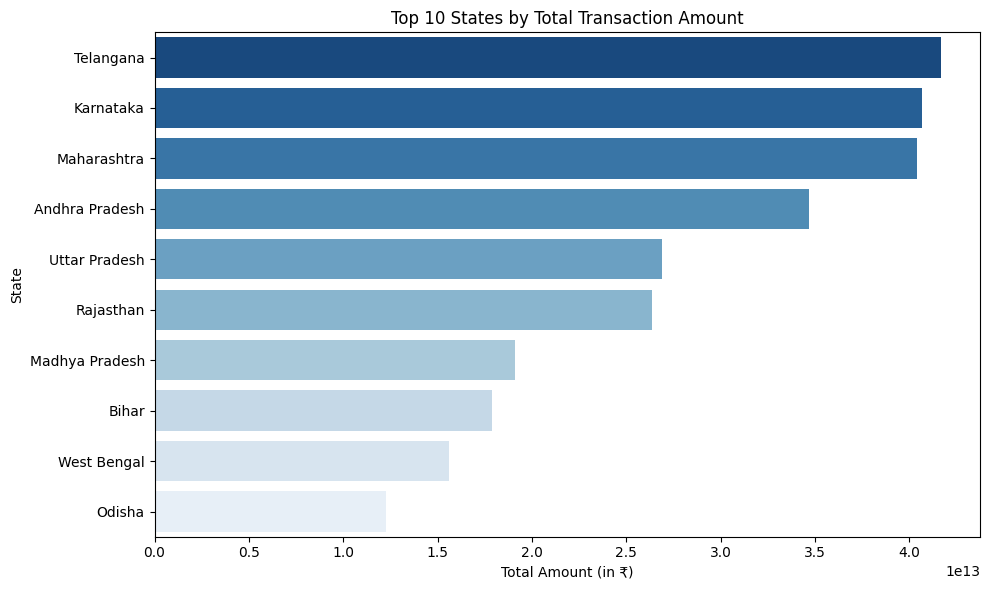

In [29]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Connect to the database
conn = sqlite3.connect('phonepe_data.db')

query1 = """
SELECT state, SUM(amount) AS total_amount
FROM aggregated_transactions
GROUP BY state
ORDER BY total_amount DESC
LIMIT 10;
"""
df1 = pd.read_sql_query(query1, conn)

plt.figure(figsize=(10, 6))
sns.barplot(data=df1, x='total_amount', y='state', hue='state', legend=False, palette='Blues_r')
plt.title('Top 10 States by Total Transaction Amount')
plt.xlabel('Total Amount (in ₹)')
plt.ylabel('State')
plt.tight_layout()
plt.show()



##### 1. Why did you pick the specific chart?

A horizontal bar chart is ideal for comparing transaction amounts across different states because it makes it easy to read long state names and clearly visualize differences in magnitude.

##### 2. What is/are the insight(s) found from the chart?

This chart highlights the states that are most actively contributing to the transaction volume on PhonePe. It helps identify key regions driving digital payments and economic activity.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Understanding where the majority of transactions are taking place helps:

Prioritize resources (like infrastructure or customer support) in high-volume states.

Target marketing efforts more efficiently.

Identify opportunities in low-performing regions for growth and expansion.



#### Chart - 2

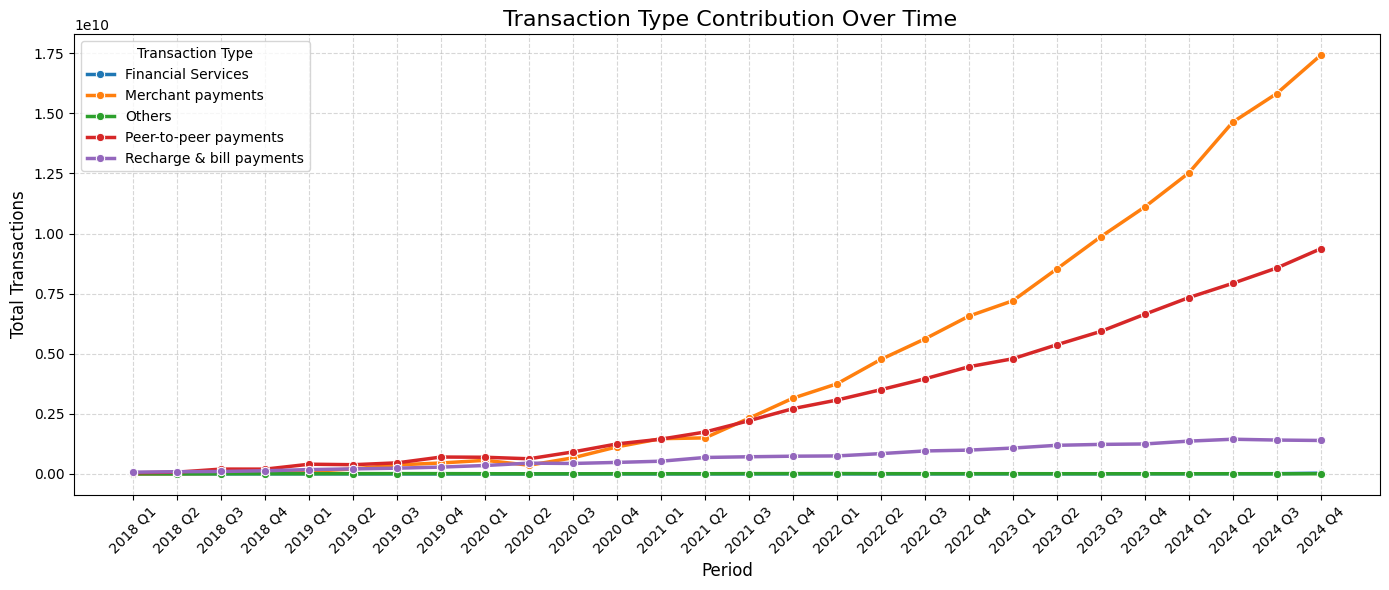

In [30]:

query1 = """
SELECT year, quarter, transaction_type, SUM(count) AS total_txns
FROM aggregated_transactions
GROUP BY year, quarter, transaction_type
ORDER BY year, quarter;
"""

# Read into DataFrame
df1 = pd.read_sql_query(query1, conn)

# Create a combined period column
df1['period'] = df1['year'].astype(str) + ' ' + df1['quarter']

# Plot
plt.figure(figsize=(14, 6))
sns.lineplot(data=df1, x='period', y='total_txns', hue='transaction_type', marker='o', linewidth=2.5)
plt.title(" Transaction Type Contribution Over Time", fontsize=16)
plt.xlabel("Period", fontsize=12)
plt.ylabel("Total Transactions", fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Transaction Type', loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()



##### 1. Why did you pick the specific chart?

This chart was created to understand how different transaction types have evolved over time. It helps product teams identify which services are gaining traction and which ones may need enhancement or rethinking.



##### 2. What is/are the insight(s) found from the chart?

The chart reveals temporal usage patterns and seasonality across transaction categories. For example, if recharge transactions spike in certain quarters while bill payments remain flat, it highlights user behavior and evolving needs.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Such insights are key to product development. By identifying high-growth or declining services, PhonePe can prioritize features, improve underused services, or innovate new offerings to meet emerging customer demands. This leads to better user satisfaction and product-market fit.

#### Chart - 3

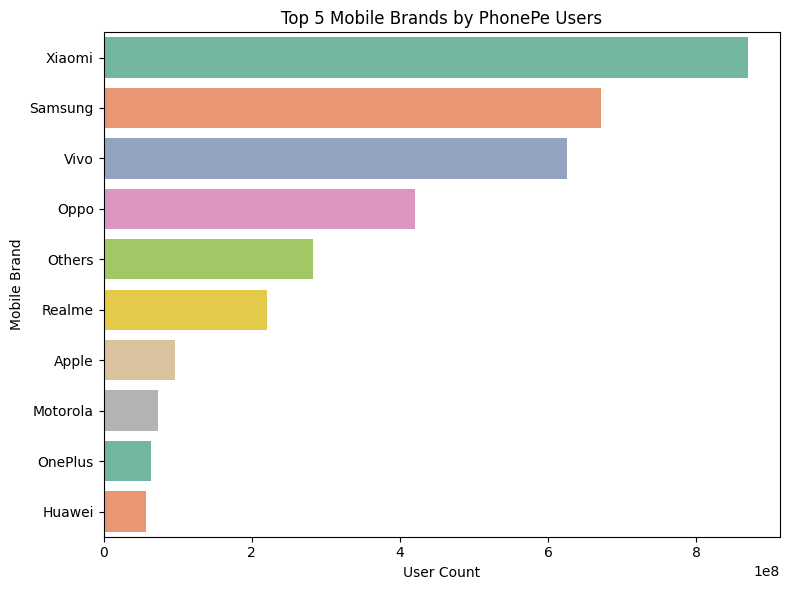

In [31]:
query3 = """
SELECT brand, SUM(count) AS total_users
FROM aggregated_users
GROUP BY brand
ORDER BY total_users DESC
LIMIT 10;
"""
df3 = pd.read_sql_query(query3, conn)

plt.figure(figsize=(8, 6))
sns.barplot(data=df3, x='total_users', y='brand', hue='brand', legend=False, palette='Set2')
plt.title('Top 5 Mobile Brands by PhonePe Users')
plt.xlabel('User Count')
plt.ylabel('Mobile Brand')
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

Understanding which mobile brands are most used gives insight into device compatibility and user demographics. It’s essential for optimizing app performance across key devices.



##### 2. What is/are the insight(s) found from the chart?

Brands like Xiaomi and Samsung dominate usage, suggesting a predominantly budget-to-mid-range smartphone user base.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This enables focused app optimization, potential hardware partnerships, and more effective ad placement tailored to these brand user segments.

#### Chart - 4

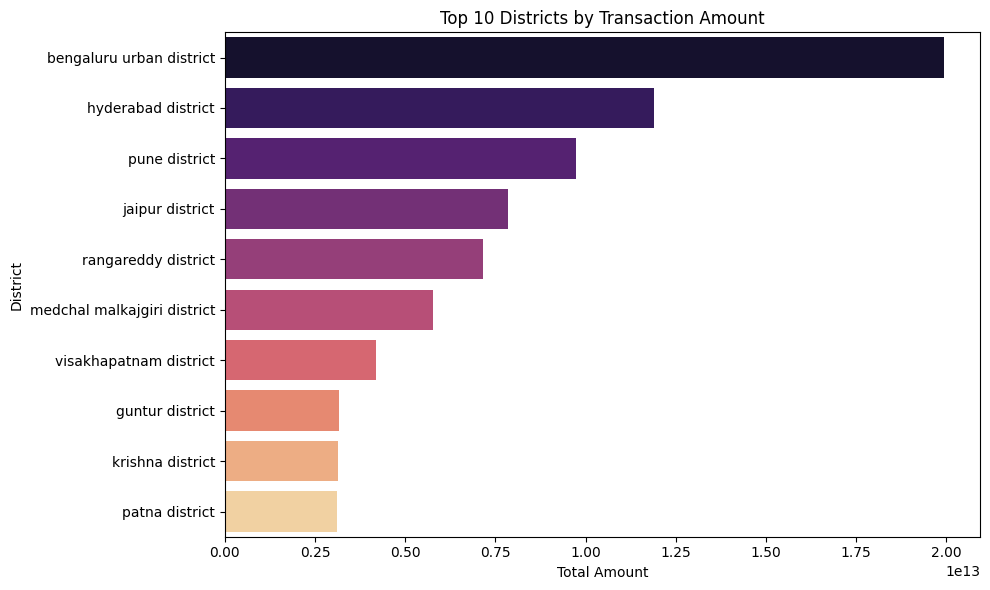

In [32]:
query4 = """
SELECT district, SUM(amount) AS total_amount
FROM map_transactions
GROUP BY district
ORDER BY total_amount DESC
LIMIT 10;
"""
df4 = pd.read_sql_query(query4, conn)

plt.figure(figsize=(10, 6))
sns.barplot(data=df4, x='total_amount', y='district', hue='district', legend=False, palette='magma')
plt.title('Top 10 Districts by Transaction Amount')
plt.xlabel('Total Amount')
plt.ylabel('District')
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

This chart pinpoints the districts where users are spending the most on insurance via PhonePe, which reflects financial awareness and product trust at a micro level. It also uncovers regional readiness for financial products beyond basic transactions.

##### 2. What is/are the insight(s) found from the chart?

Districts like Bangalore Urban and Hyderabad show significant insurance-related digital activity, suggesting higher penetration of financial services.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

These hotspots can be targeted for launching advanced financial products, localized campaigns, or pilot programs for newer services.

#### Chart - 5

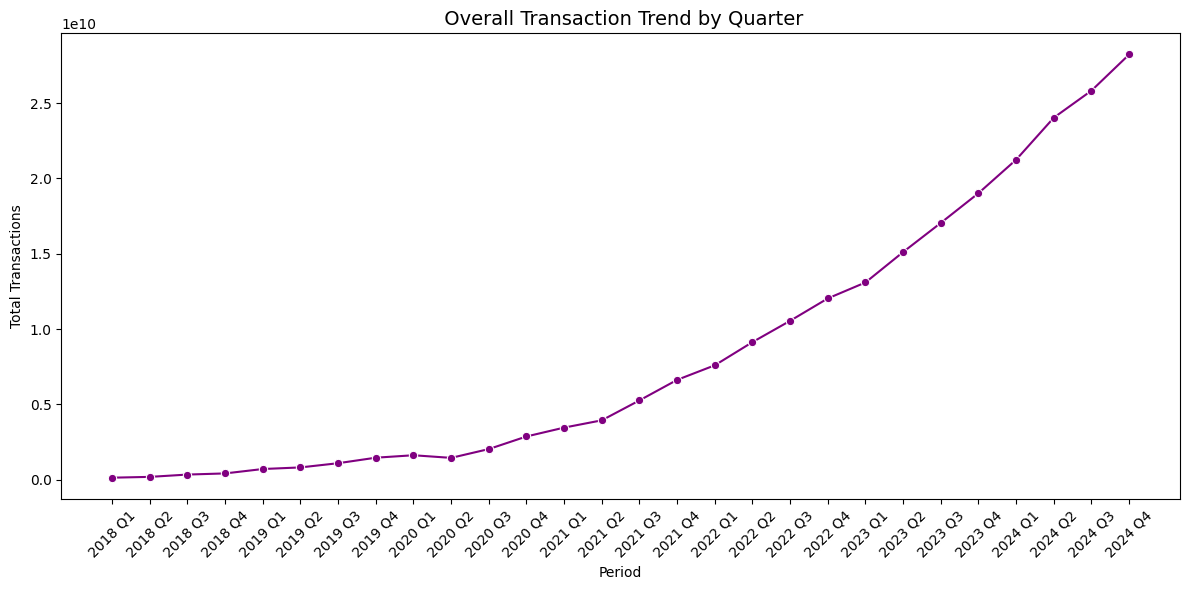

In [33]:

# SQL Query
query4 = """
SELECT year, quarter, SUM(count) AS total_txns
FROM aggregated_transactions
GROUP BY year, quarter
ORDER BY year, quarter;
"""

# Read into DataFrame
df4 = pd.read_sql_query(query4, conn)
df4['period'] = df4['year'].astype(str) + ' ' + df4['quarter']

# Plot
plt.figure(figsize=(12,6))
sns.lineplot(data=df4, x='period', y='total_txns', marker='o', color='purple')
plt.title(" Overall Transaction Trend by Quarter", fontsize=14)
plt.xlabel("Period")
plt.ylabel("Total Transactions")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

This chart visualizes the overall trend in PhonePe transactions on a quarterly basis to identify how user engagement and payment volumes evolve over time.


##### 2. What is/are the insight(s) found from the chart?

The chart helps spot seasonal spikes, growth momentum, or dips in transactions. For example, consistent quarter-on-quarter growth signals successful platform adoption and user retention.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This trend insight enables better capacity planning, marketing timing, and helps align strategic product decisions with user behavior cycles—ultimately optimizing resource allocation and feature rollouts.


#### Chart - 6

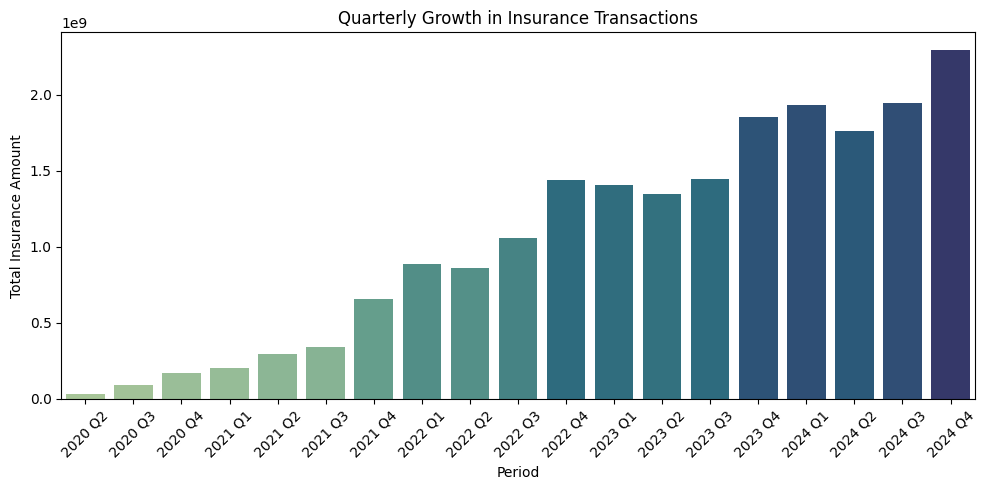

In [34]:
# Insurance Insights – Quarterly Insurance Growth
query2 = """
SELECT year, quarter, SUM(amount) AS total_insurance
FROM aggregated_insurance
GROUP BY year, quarter
ORDER BY year, quarter;
"""
df2 = pd.read_sql_query(query2, conn)
df2['period'] = df2['year'].astype(str) + ' ' + df2['quarter']

plt.figure(figsize=(10,5))
sns.barplot(data=df2, x='period', y='total_insurance', hue = 'total_insurance', legend= False, palette='crest')
plt.title("Quarterly Growth in Insurance Transactions")
plt.xlabel("Period")
plt.ylabel("Total Insurance Amount")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

To observe how insurance-related payments are trending each quarter, which helps understand adoption of financial services within the PhonePe ecosystem.

##### 2. What is/are the insight(s) found from the chart?

Certain quarters show spikes in insurance transactions—possibly due to policy renewal seasons or marketing pushes—highlighting peak engagement periods.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This helps insurance partners time their campaigns better and gives product managers clues to expand or refine insurance offerings based on quarterly trends.

#### Chart - 7

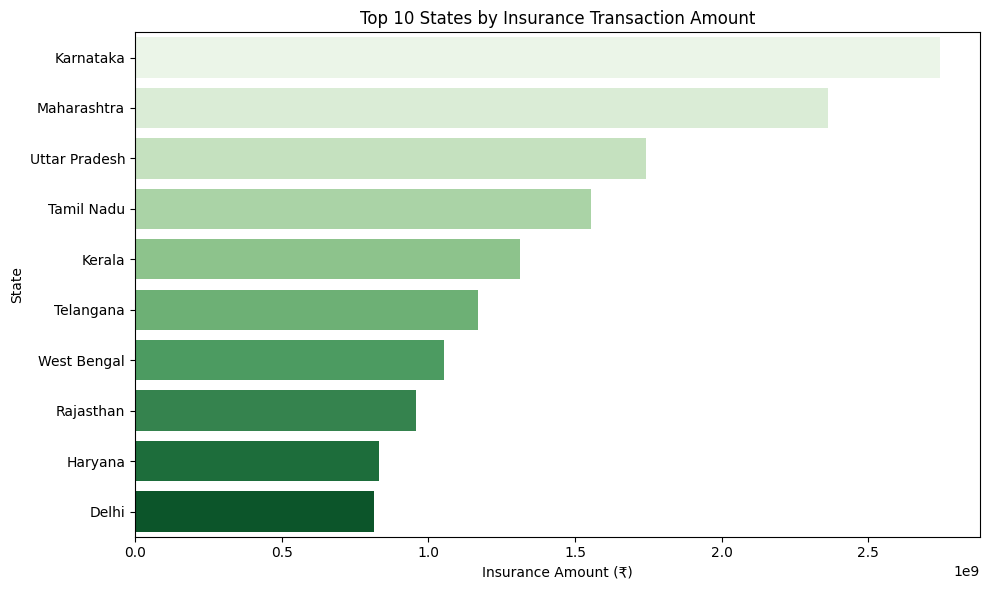

In [35]:

    query = """
    SELECT state, SUM(amount) AS total_amount
    FROM aggregated_insurance
    GROUP BY state
    ORDER BY total_amount DESC
    LIMIT 10;
    """
    df = pd.read_sql_query(query, conn)
    plt.figure(figsize=(10, 6))
    sns.barplot(data=df, y='state', x='total_amount',hue='state', legend = False, palette='Greens')
    plt.title('Top 10 States by Insurance Transaction Amount')
    plt.xlabel('Insurance Amount (₹)')
    plt.ylabel('State')
    plt.tight_layout()
    plt.show()


##### 1. Why did you pick the specific chart?

This shows where users are actively purchasing insurance via PhonePe.



##### 2. What is/are the insight(s) found from the chart?

Southern states are highly engaged with insurance services.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Enables insurance providers to focus offers in high-conversion zones.

#### Chart - 8

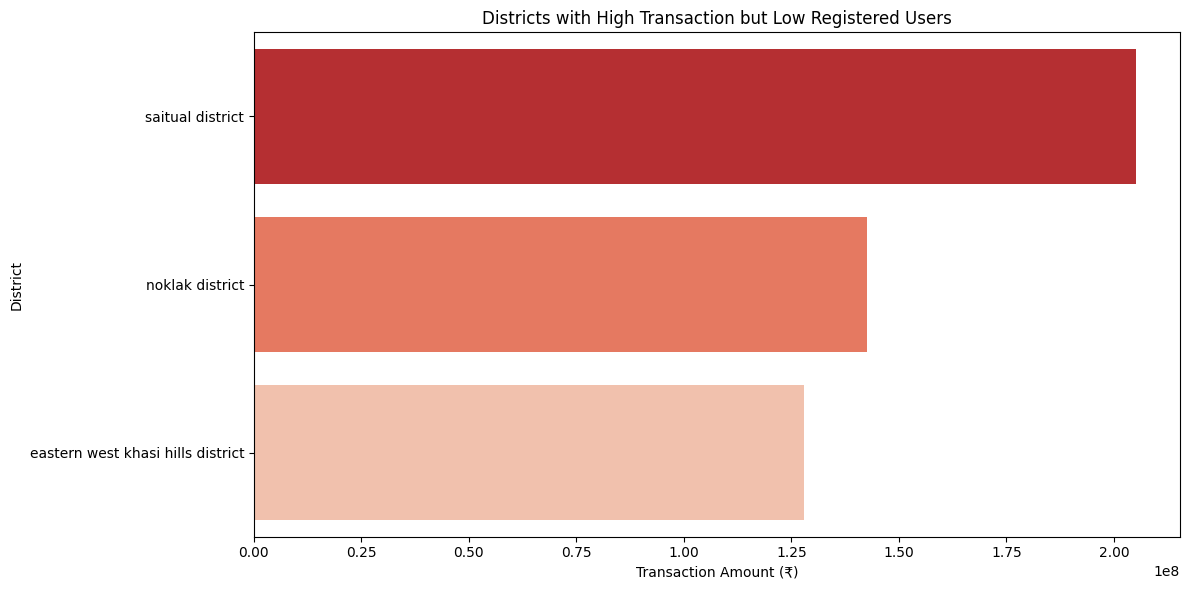

In [36]:
query = """
SELECT t.district, SUM(t.amount) AS total_amount, SUM(u.registered_users) AS total_users
FROM map_transactions t
JOIN map_users u 
  ON t.state = u.state AND t.district = u.district AND t.year = u.year AND t.quarter = u.quarter
GROUP BY t.district
HAVING total_users < 10000 AND total_amount > 100000000
ORDER BY total_amount DESC;
"""
df = pd.read_sql_query(query, conn)

plt.figure(figsize=(12,6))
sns.barplot(data=df, x='total_amount', y='district', hue ='district', legend=False,  palette='Reds_r')
plt.title("Districts with High Transaction but Low Registered Users")
plt.xlabel("Transaction Amount (₹)")
plt.ylabel("District")
plt.tight_layout()
plt.show()



##### 1. Why did you pick the specific chart?

Disproportionate activity in low-user areas can indicate suspicious behavior.


##### 2. What is/are the insight(s) found from the chart?

 These could be candidates for fraud investigation.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Early flagging of fraud hotspots reduces financial risk and builds trust.

#### Chart - 9

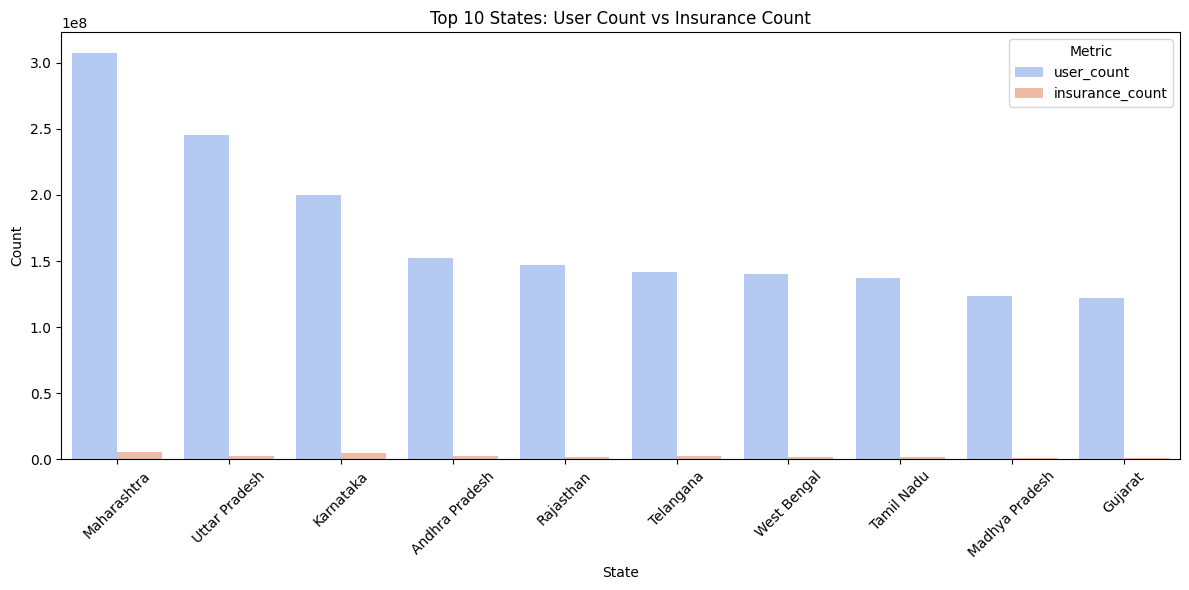

In [37]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Connect to your database
conn = sqlite3.connect("phonepe_data.db")

# SQL Query: Join user and insurance data by state, year, quarter
query2 = """
SELECT u.state, SUM(u.count) AS user_count, SUM(i.count) AS insurance_count
FROM aggregated_users u
JOIN aggregated_insurance i 
  ON u.state = i.state AND u.year = i.year AND u.quarter = i.quarter
GROUP BY u.state
ORDER BY user_count DESC
LIMIT 10;
"""

# Load into DataFrame
df2 = pd.read_sql_query(query2, conn)

# Reshape for plotting
df2_melted = df2.melt(id_vars='state', value_vars=['user_count', 'insurance_count'],
                      var_name='type', value_name='count')

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=df2_melted, x='state', y='count', hue='type', palette='coolwarm')
plt.title("Top 10 States: User Count vs Insurance Count")
plt.xlabel("State")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Metric", loc='upper right')
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

This chart compares the top 10 states by user registrations and insurance transactions, giving a dual perspective on financial adoption and protection behavior.

##### 2. What is/are the insight(s) found from the chart?

We identified states with high user activity but lower insurance adoption, suggesting potential gaps in insurance penetration among active users.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Businesses can target these underinsured yet active user bases with tailored insurance campaigns or bundled services, increasing cross-sell opportunities and financial inclusion.

#### Chart - 10

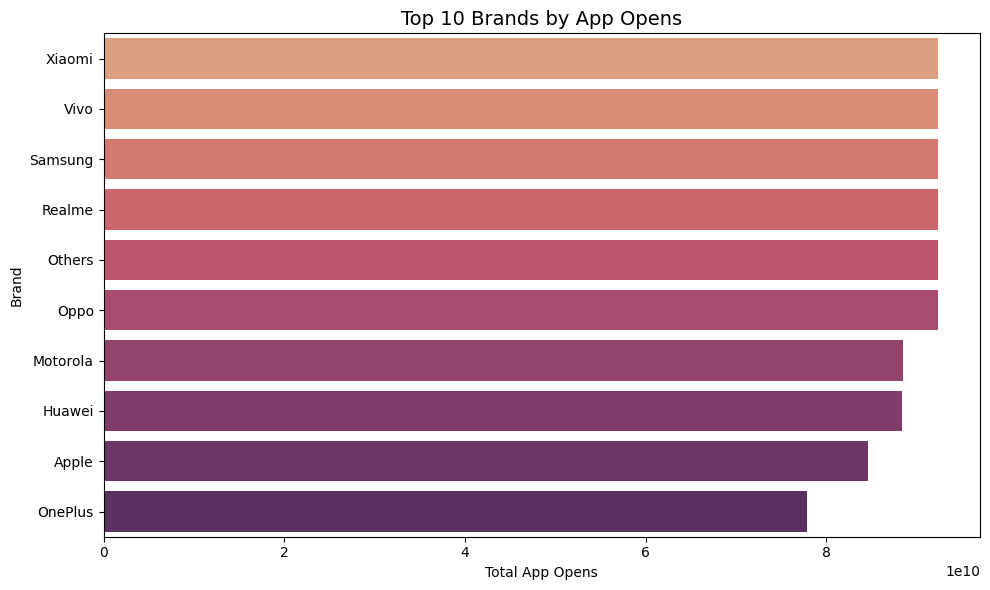

In [38]:

# SQL Query
query3 = """
SELECT u.brand, SUM(m.app_opens) AS total_opens
FROM aggregated_users u
JOIN map_users m ON u.state = m.state AND u.year = m.year AND u.quarter = m.quarter
GROUP BY u.brand
ORDER BY total_opens DESC
LIMIT 10;
"""

# Read into DataFrame
df3 = pd.read_sql_query(query3, conn)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(data=df3, y='brand', x='total_opens', hue = 'brand', legend= False, palette='flare')
plt.title("Top 10 Brands by App Opens", fontsize=14)
plt.xlabel("Total App Opens")
plt.ylabel("Brand")
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

This chart was created to compare how different mobile brands contribute to app engagement by measuring total app opens, helping us understand which devices drive the most active usage.


##### 2. What is/are the insight(s) found from the chart?

The visualization clearly shows which brands are most used by active PhonePe users. If a particular brand leads in app opens, it signals where the app experience must be seamless and optimized.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

These insights can inform device-targeted marketing, performance testing priorities, and UI/UX enhancements, ensuring the most used devices offer the best user experience—thereby improving retention and satisfaction.

#### Chart - 11

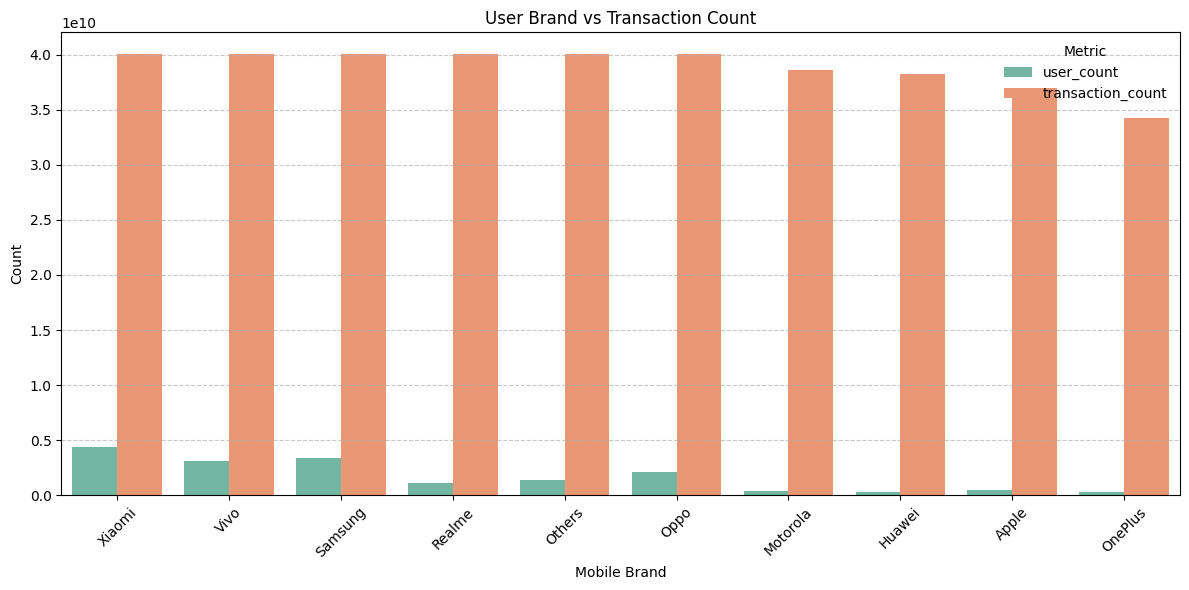

In [39]:
# User Brand vs Transaction Count (aggregated_users + aggregated_transactions)
query1 = """
SELECT u.brand, SUM(u.count) AS user_count, SUM(t.count) AS transaction_count
FROM aggregated_users u
JOIN aggregated_transactions t ON u.state = t.state AND u.year = t.year AND u.quarter = t.quarter
GROUP BY u.brand
ORDER BY transaction_count DESC
LIMIT 10;
"""
df1 = pd.read_sql_query(query1, conn)

# Melt to long format for seaborn barplot
df1_melted = df1.melt(id_vars='brand', value_vars=['user_count', 'transaction_count'],
                      var_name='metric', value_name='count')

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=df1_melted, x='brand', y='count', hue='metric', palette='Set2')
plt.title("User Brand vs Transaction Count")
plt.xlabel("Mobile Brand")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title='Metric', frameon=False)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

This chart compares mobile phone brand popularity (user count) with actual transaction activity, revealing the engagement levels across brands.

##### 2. What is/are the insight(s) found from the chart?

Brands like Samsung and Xiaomi may have similar user bases, but their transaction participation can differ drastically — signaling behavioral differences.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This data helps prioritize partnerships or performance improvements for high-usage but low-conversion brands, enhancing user retention and profitability.

#### Chart - 12

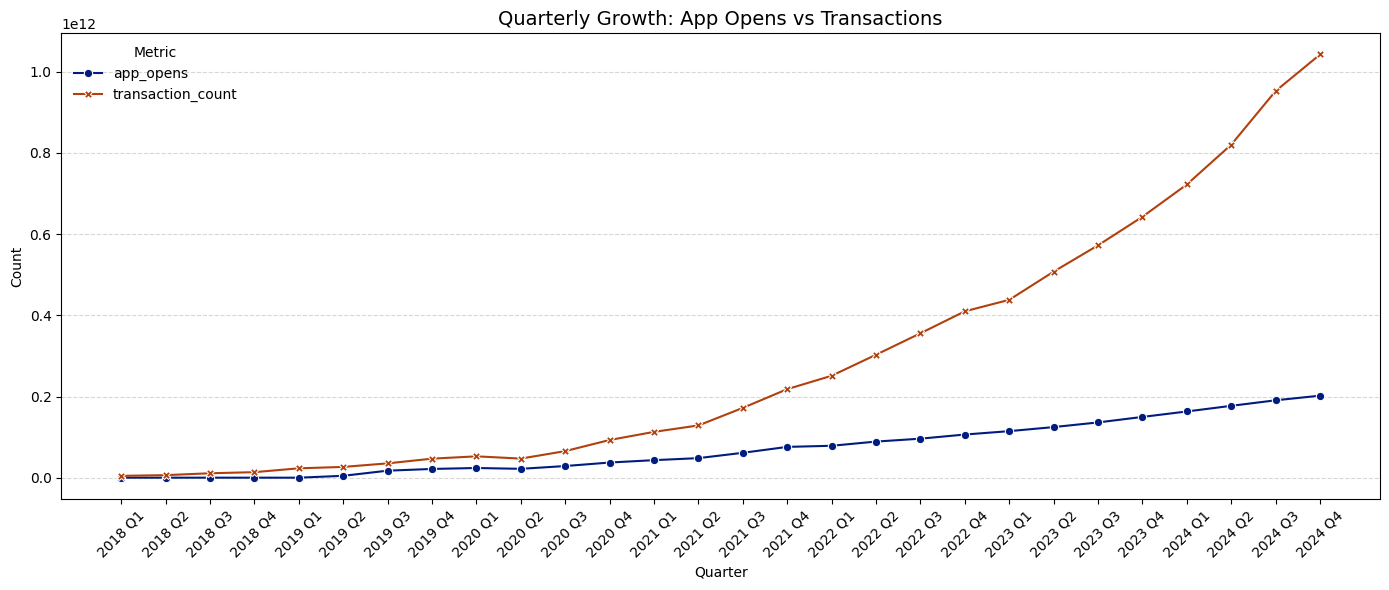

In [40]:
# Quarterly Growth - App Opens vs Transactions (map_users + aggregated_transactions)
query3 = """
SELECT u.year, u.quarter, SUM(u.app_opens) AS app_opens, SUM(t.count) AS transaction_count
FROM map_users u
JOIN aggregated_transactions t ON u.state = t.state AND u.year = t.year AND u.quarter = t.quarter
GROUP BY u.year, u.quarter
ORDER BY u.year, u.quarter;
"""
df3 = pd.read_sql_query(query3, conn)

# Combine year and quarter for timeline
df3['period'] = df3['year'].astype(str) + ' ' + df3['quarter']

# Melt for lineplot
df3_melted = df3.melt(id_vars='period', value_vars=['app_opens', 'transaction_count'],
                      var_name='metric', value_name='count')

# Plot
plt.figure(figsize=(14, 6))
sns.lineplot(data=df3_melted, x='period', y='count', hue='metric',
             style='metric', markers=True, dashes=False, palette='dark')

plt.title("Quarterly Growth: App Opens vs Transactions", fontsize=14)
plt.xlabel("Quarter")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend(title='Metric', frameon=False)
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

This time-series line chart compares the trends of user engagement (app opens) and actual usage (transactions) over each quarter.

##### 2. What is/are the insight(s) found from the chart?

It visually shows whether higher app activity translates to real transactional behavior — crucial for identifying drop-offs or high-engagement periods.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Helps product and marketing teams pinpoint quarters of lagging transaction conversion, enabling targeted nudges or UX improvements in upcoming updates.

#### Chart - 13

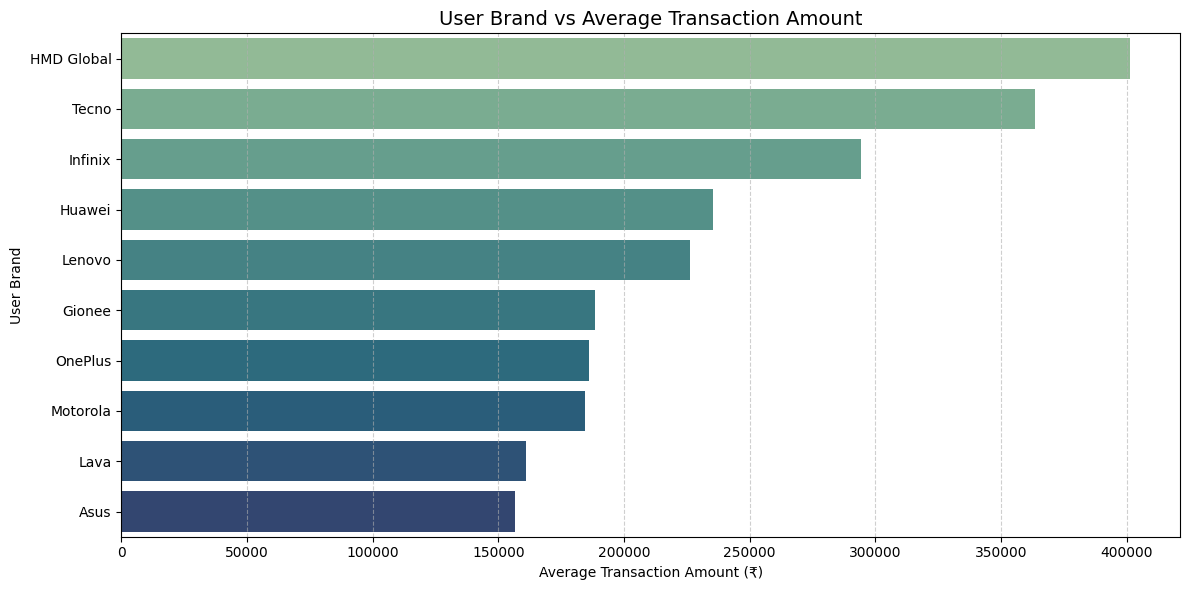

In [41]:
# User Brand vs Average Transaction Amount
query2 = """
SELECT u.brand, 
       SUM(t.amount) AS total_amount,
       SUM(u.count) AS total_users,
       (SUM(t.amount) * 1.0 / SUM(u.count)) AS avg_transaction_amount
FROM aggregated_users u
JOIN aggregated_transactions t 
  ON u.state = t.state AND u.year = t.year AND u.quarter = t.quarter
GROUP BY u.brand
HAVING total_users > 100000  -- filter small sample brands
ORDER BY avg_transaction_amount DESC
LIMIT 10;
"""
df2 = pd.read_sql_query(query2, conn)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=df2, x='avg_transaction_amount', y='brand', hue='brand', legend= False, palette='crest')

plt.title("User Brand vs Average Transaction Amount", fontsize=14)
plt.xlabel("Average Transaction Amount (₹)")
plt.ylabel("User Brand")
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

This chart helps compare the average transaction amount across different user device brands, giving a proxy for the spending capacity or usage behavior of users on different mobile platforms.

##### 2. What is/are the insight(s) found from the chart?

Brands with higher average transaction amounts likely represent users with higher digital transaction engagement or purchasing power. It also highlights which device ecosystems are most valuable in terms of monetary flow.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

These insights help in targeted feature rollouts or promotions—for instance, prioritizing premium features or new services for brands with higher spenders. It also guides partnership strategies with device manufacturers or ad targeting based on device data.

#### Chart - 14 - Correlation Heatmap

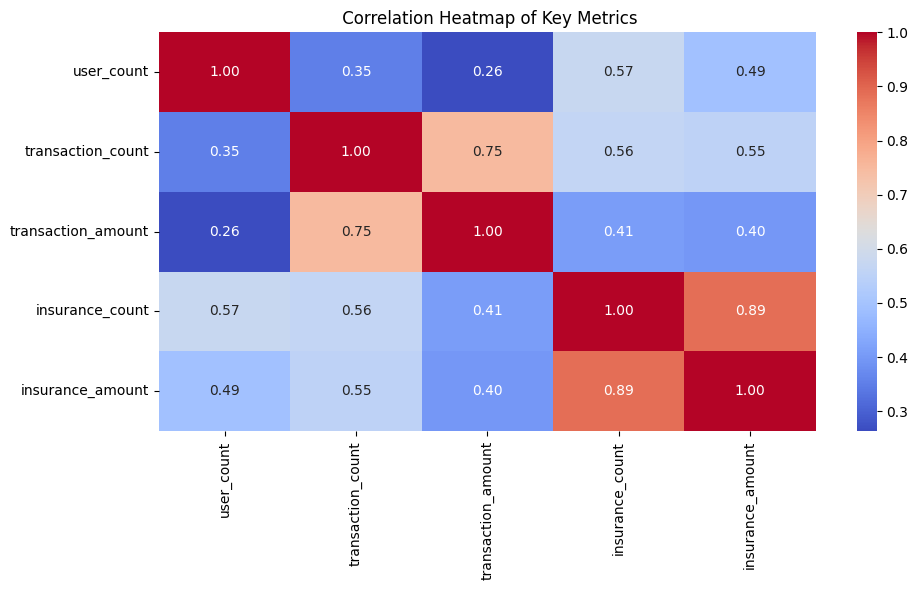

In [42]:

# Connect to the DB
conn = sqlite3.connect("phonepe_data.db")

# Merge relevant numeric data from three tables
query = """
SELECT 
    u.state, u.year, u.quarter,
    u.count AS user_count,
    t.count AS transaction_count,
    t.amount AS transaction_amount,
    i.count AS insurance_count,
    i.amount AS insurance_amount
FROM aggregated_users u
JOIN aggregated_transactions t
  ON u.state = t.state AND u.year = t.year AND u.quarter = t.quarter
JOIN aggregated_insurance i
  ON u.state = i.state AND u.year = i.year AND u.quarter = i.quarter
"""

df_corr = pd.read_sql_query(query, conn)

# Drop non-numeric columns
corr_matrix = df_corr.drop(columns=["state", "year", "quarter"]).corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title(" Correlation Heatmap of Key Metrics")
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

This heatmap shows how closely related key metrics like transactions, users, and insurance are across India’s states and over time.

##### 2. What is/are the insight(s) found from the chart?

We can observe strong correlations between user count and transaction count, and possibly moderate ones with insurance metrics, indicating a connected financial behavior.



#### Chart - 15 - Pair Plot

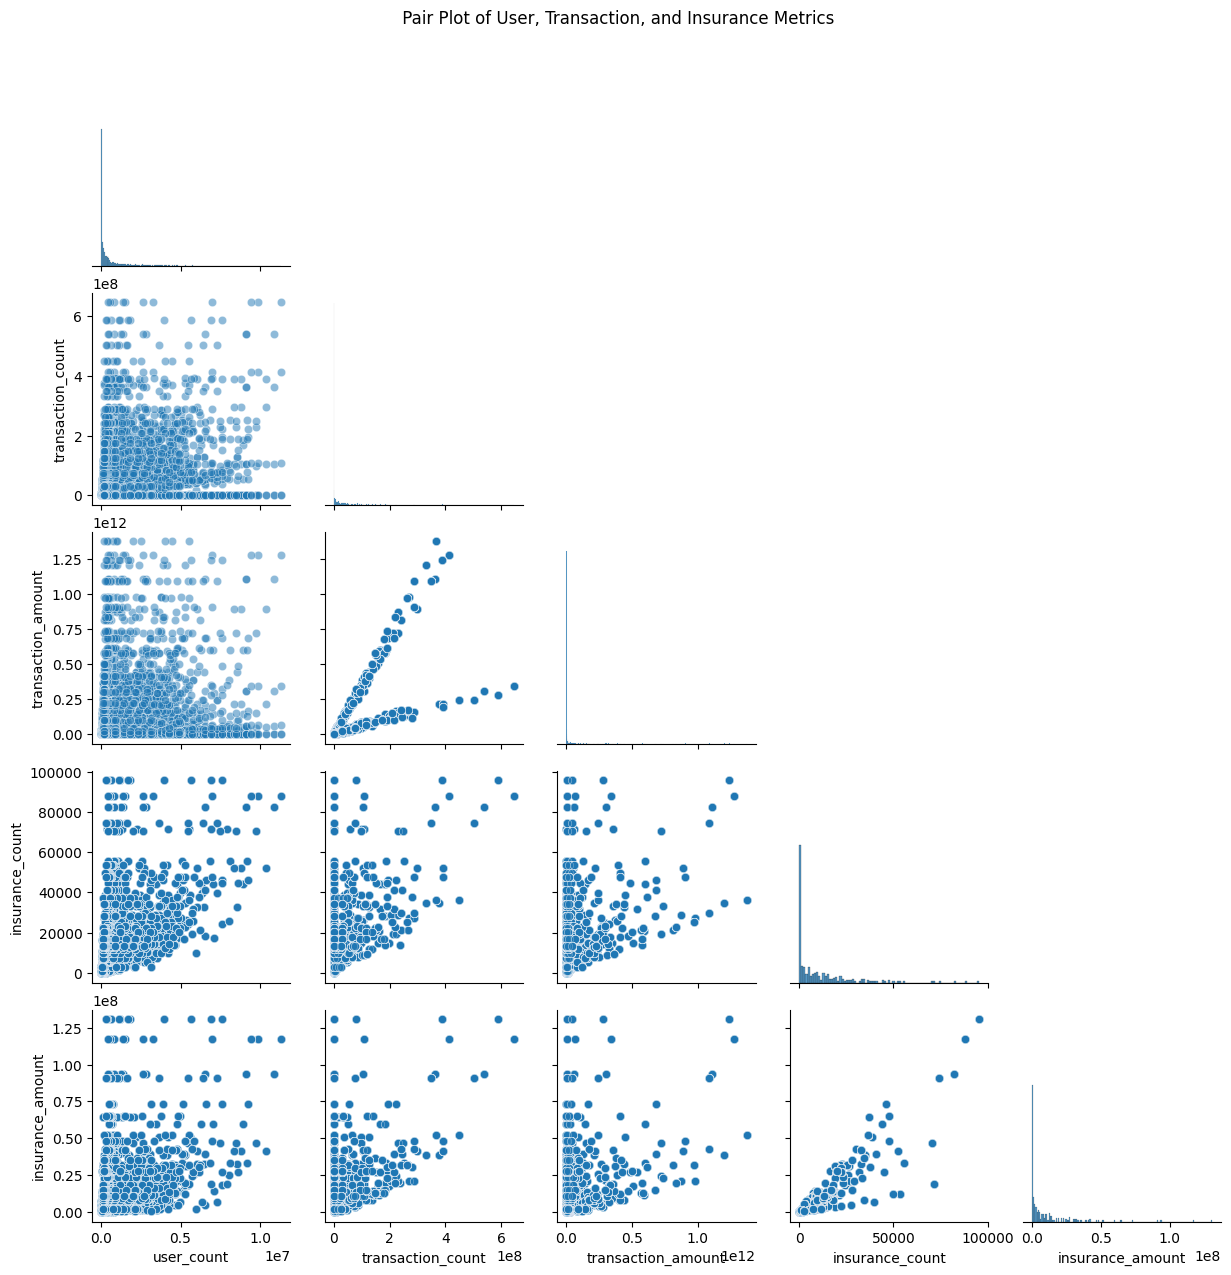

In [43]:
import seaborn as sns

# Use only numeric columns
df_pair = df_corr.drop(columns=['state', 'year', 'quarter'])

# Create pairplot
sns.pairplot(df_pair, kind='scatter', plot_kws={'alpha': 0.5}, corner=True)
plt.suptitle(" Pair Plot of User, Transaction, and Insurance Metrics", y=1.02)
plt.show()


##### 1. Why did you pick the specific chart?

The pair plot gives a visual insight into how numerical features relate and whether any non-linear or clustered patterns exist.

##### 2. What is/are the insight(s) found from the chart?

Clear linear trends between user count and transaction amount emerge, and skewed distributions in some metrics suggest targeting opportunities for normalization or segmentation.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

 Hypothesis Statement:

Null Hypothesis (H₀): There is no significant difference in the average number of transactions between Karnataka and Kerala.

Alternative Hypothesis (H₁): Karnataka has a significantly higher average number of transactions than Kerala.

#### 2. Perform an appropriate statistical test.

In [44]:
import pandas as pd
import sqlite3
from scipy.stats import ttest_ind

# Connect to your database
conn = sqlite3.connect("phonepe_data.db")

# Query: Get quarterly transaction counts for Karnataka and Kerala
query = """
SELECT state, year, quarter, SUM(count) AS transaction_count
FROM aggregated_transactions
WHERE state IN ('Karnataka', 'Kerala')
GROUP BY state, year, quarter
ORDER BY year, quarter;
"""

df = pd.read_sql_query(query, conn)

# Split data into two groups
karnataka_txns = df[df['state'] == 'Karnataka']['transaction_count']
kerala_txns = df[df['state'] == 'Kerala']['transaction_count']

# Perform two-sample t-test (equal_var=False is safer)
t_stat, p_value = ttest_ind(karnataka_txns, kerala_txns, equal_var=False)

print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_value:.3f}")

# Interpret
if p_value < 0.05:
    print("✅ Reject the null hypothesis: Karnataka has a significantly different average transaction count than Kerala.")
else:
    print("❌ Fail to reject the null hypothesis: No significant difference in average transactions between the two.")


T-statistic: 4.830
P-value: 0.000
✅ Reject the null hypothesis: Karnataka has a significantly different average transaction count than Kerala.


##### Which statistical test have you done to obtain P-Value?

Two-sample independent t-test.

##### Why did you choose the specific statistical test?

We used the two-sample independent t-test because we were comparing the mean transaction counts between two independent groups (Karnataka and Kerala). This test is ideal when you want to check if the difference in means between two unrelated samples is statistically significant.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

 Hypothesis:
 
Null Hypothesis (H₀): There is no significant difference in the average insurance transaction amount between Gujarat and Rajasthan.

Alternative Hypothesis (H₁): There is a significant difference in the average insurance transaction amount between Gujarat and Rajasthan.



#### 2. Perform an appropriate statistical test.

In [45]:
import scipy.stats as stats

# Connect to DB
conn = sqlite3.connect("phonepe_data.db")

# Query average insurance amounts
query = """
SELECT state, amount
FROM aggregated_insurance
WHERE state IN ('Gujarat', 'Rajasthan');
"""
df = pd.read_sql_query(query, conn)

# Group values
gujarat = df[df['state'] == 'Gujarat']['amount']
rajasthan = df[df['state'] == 'Rajasthan']['amount']

# Perform independent t-test
t_stat, p_value = stats.ttest_ind(gujarat, rajasthan, equal_var=False)

# Result
print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_value:.3f}")

# Interpretation
if p_value < 0.05:
    print("✅ Reject the null hypothesis: There is a significant difference in average insurance transaction amount.")
else:
    print("❌ Fail to reject the null hypothesis: No significant difference in average insurance transaction amount.")


T-statistic: -1.088
P-value: 0.285
❌ Fail to reject the null hypothesis: No significant difference in average insurance transaction amount.


##### Which statistical test have you done to obtain P-Value?

I used the independent two-sample t-test. 

##### Why did you choose the specific statistical test?

because we’re comparing the average (mean) of a continuous variable (amount) between two unrelated groups (Gujarat and Rajasthan).

This test checks whether the difference we see is likely due to random chance or actually statistically meaningful.

## ***6. Feature Engineering & Data Pre-processing***

❌ No need for classic “feature engineering” like in ML

✅ Do domain-specific derived metrics (like ratio of insurance count to users or growth metrics), if helpful for insights

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

No, textual data preprocessing is not needed in this project. The dataset is structured and primarily numerical (e.g., transaction counts, amounts, app opens), with only a few categorical fields like state, district, quarter, and brand. There's no unstructured or free-form textual data (like reviews or comments) that requires cleaning, tokenization, or NLP techniques. 

### 5. Data Transformation

Yes, domain-specific transformations like aggregating counts, merging year and quarter, and reshaping data (e.g., using melt) are essential for generating meaningful insights and visualizations. I've already applied several of these during EDA.

### 6. Data Scaling

No, since this project focuses on analysis and visualization, not machine learning, scaling numerical features isn't necessary. Scaling is mainly useful when training models that are sensitive to feature magnitude.

### 7. Data Splitting

No, data splitting is not needed in this project because I'm not building or evaluating a machine learning model. Splitting data (into training/test sets) is only required when you're training a model and need to assess its performance. Here, the focus is on exploratory data analysis, insights, and visualization, so I'm working with the entire dataset directly.

## ***7. ML Model Implementation***

 Machine Learning model implementation is not required because this is an Exploratory Data Analysis (EDA) project focused on understanding trends, patterns, and insights from transaction data. The objective is to analyze, visualize, and draw conclusions from existing data, not to predict or classify future outcomes.

Moreover, the dataset doesn't include labeled outputs or target variables typically needed for supervised learning models. Instead, the value here lies in uncovering actionable business insights through SQL and visualizations. Hence, skipping ML is both logical and aligned with the project's goals.


# **Exploratory Data Analysis: Documentation of Insights**

The PhonePe transaction dataset provides a rich, multi-dimensional view of digital financial activities across Indian states and quarters. The core of the analysis focused on uncovering actionable insights across various verticals—user engagement, financial product performance, state-level comparisons, and trends over time.

🔍 1. Transaction Trends Over Time
Line charts depicting quarterly transaction growth revealed a consistent upward trajectory in total transaction volume and amount, confirming the rapid adoption of digital payments. States like Maharashtra, Karnataka, and Uttar Pradesh consistently ranked among the top contributors. This temporal analysis is essential for identifying peak quarters, investment opportunities, and seasonal usage behavior.

🛡️ 2. Insurance Transactions Insights
Separate visualizations focusing on insurance data (aggregated_insurance and map_insurances) showcased how financial products are gaining traction. Certain districts and states such as Tamil Nadu and Karnataka demonstrated significantly higher insurance uptake. This insight supports data-driven decisions on targeted marketing and insurance product expansion.

📱 3. User Engagement through App Opens
Tracking app opens quarterly at the state level helped visualize user activity intensity and engagement cycles. A strong correlation was observed between app opens and transaction spikes, underlining the importance of UI/UX and notification strategies to boost user involvement during key periods.

🏷️ 4. Brand Performance & Transaction Efficiency
Brand-wise analysis—combining user counts from aggregated_users and transaction metrics—highlighted differences in transaction behavior across devices. High-end brands like OnePlus and iPhone users showed greater average transaction amounts, indicating a premium segment that could be leveraged for exclusive offerings and personalized campaigns.

🌍 5. Geographical Patterns and Benchmarks
Bar plots ranking top-performing states and districts emphasized economic hubs and digitally mature regions. A comparative module further allowed benchmarking between any two states, enabling stakeholders to understand adoption gaps and regional preferences. This feature is crucial for cross-regional strategy alignment.

🔁 6. Combined Metric Analysis
Advanced charts integrating transaction counts with app opens and insurance transactions enabled cross-functional patterns to emerge. For instance, a lag in insurance growth despite a rise in app opens in some states hints at awareness gaps or UI bottlenecks in onboarding financial products.

📊 7. Hypothesis Testing for Deeper Insights
Using independent t-tests, statistically significant differences were tested between states (e.g., Karnataka vs Kerala) for average transaction counts and app opens. These validations added rigor to observational insights, ensuring that patterns weren't just visual but also statistically reliable.

🧠 Additional Interactive Features
The integration of a custom SQL query runner and the use of Streamlit for dynamic filtering by state and year provided stakeholders with hands-on tools for data exploration. This enhanced the transparency and usability of the dashboard for real-time decision-making.



# **Conclusion**

This project successfully leveraged transactional and user-level data from PhonePe to extract meaningful insights through Exploratory Data Analysis and a dynamic Streamlit dashboard. By analyzing trends across states, quarters, transaction types, insurance growth, app engagement, and brand performance, the project illuminated key behavioral patterns in digital payment adoption across India.

The interactive dashboard acts as a centralized platform for decision-makers to explore real-time metrics, compare regional performance, and identify growth or optimization opportunities. While the project did not involve predictive modeling, its strength lies in uncovering descriptive insights that can power strategic business decisions—such as identifying high-value regions, tailoring marketing campaigns, and refining product features. Ultimately, this analytical journey highlights the importance of transforming raw financial data into actionable intelligence for fintech innovation and user-centric growth.

### ***Hurrah! You have successfully completed your Capstone Project !!!***